# CASA0002 ASSESSMENT

## Part 1: London’s underground resilience

### I. Topological network
In this part, you will evaluate the resilience of the London’s underground through the removal of
stations that can potentially make the underground vulnerable. Through the procedure outlined below
you will investigate which are the stations that are most critical for the functioning of the
underground, and which methodology is more appropriate to finding these stations.

#### I.1. Centrality measures:
Select 3 centrality measures to characterise nodes, aiming at identifying the most important nodes in
the underground network. Give the definition of each of the measures (including their equation), put
the measures into the context of the underground, and why they will allow you to find the stations that
are most crucial for the functioning of the underground. Compute the measures for your nodes in the
network, and give the results in a table for the first 10 ranked nodes for each of the 3 measures. 

In [104]:
import networkx as nx
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import geopandas as gpd
import json
from shapely.geometry import Point, LineString 
from scipy.spatial import distance
import matplotlib.cm as cm 

In [105]:
# create graph London's underground
filename = 'london_tubenetwork.graphml'
G = nx.read_graphml(filename)

In [106]:
# create graph London's underground

G = nx.read_graphml('london_tubenetwork.graphml')

type(G)

networkx.classes.graph.Graph

In [107]:
# list all operations of the G object
print(len(dir(G)))
for i in np.random.randint(0, len(dir(G)), 10):
    print(dir(G)[i])


76
__getstate__
__dict__
__subclasshook__
nodes
name
remove_edge
__eq__
__subclasshook__
to_directed_class
has_edge


In [108]:
print(G.number_of_nodes())
print(G.number_of_edges())

438
486


In [109]:
# To check node attributes:
list(G.nodes(data = True))[0]

('910GCAMHTH',
 {'station_name': 'Cambridge Heath',
  'lines': 'London Overground',
  'coords': '(534825.0140298002, 183290.813466997)'})

In [110]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [111]:
# add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

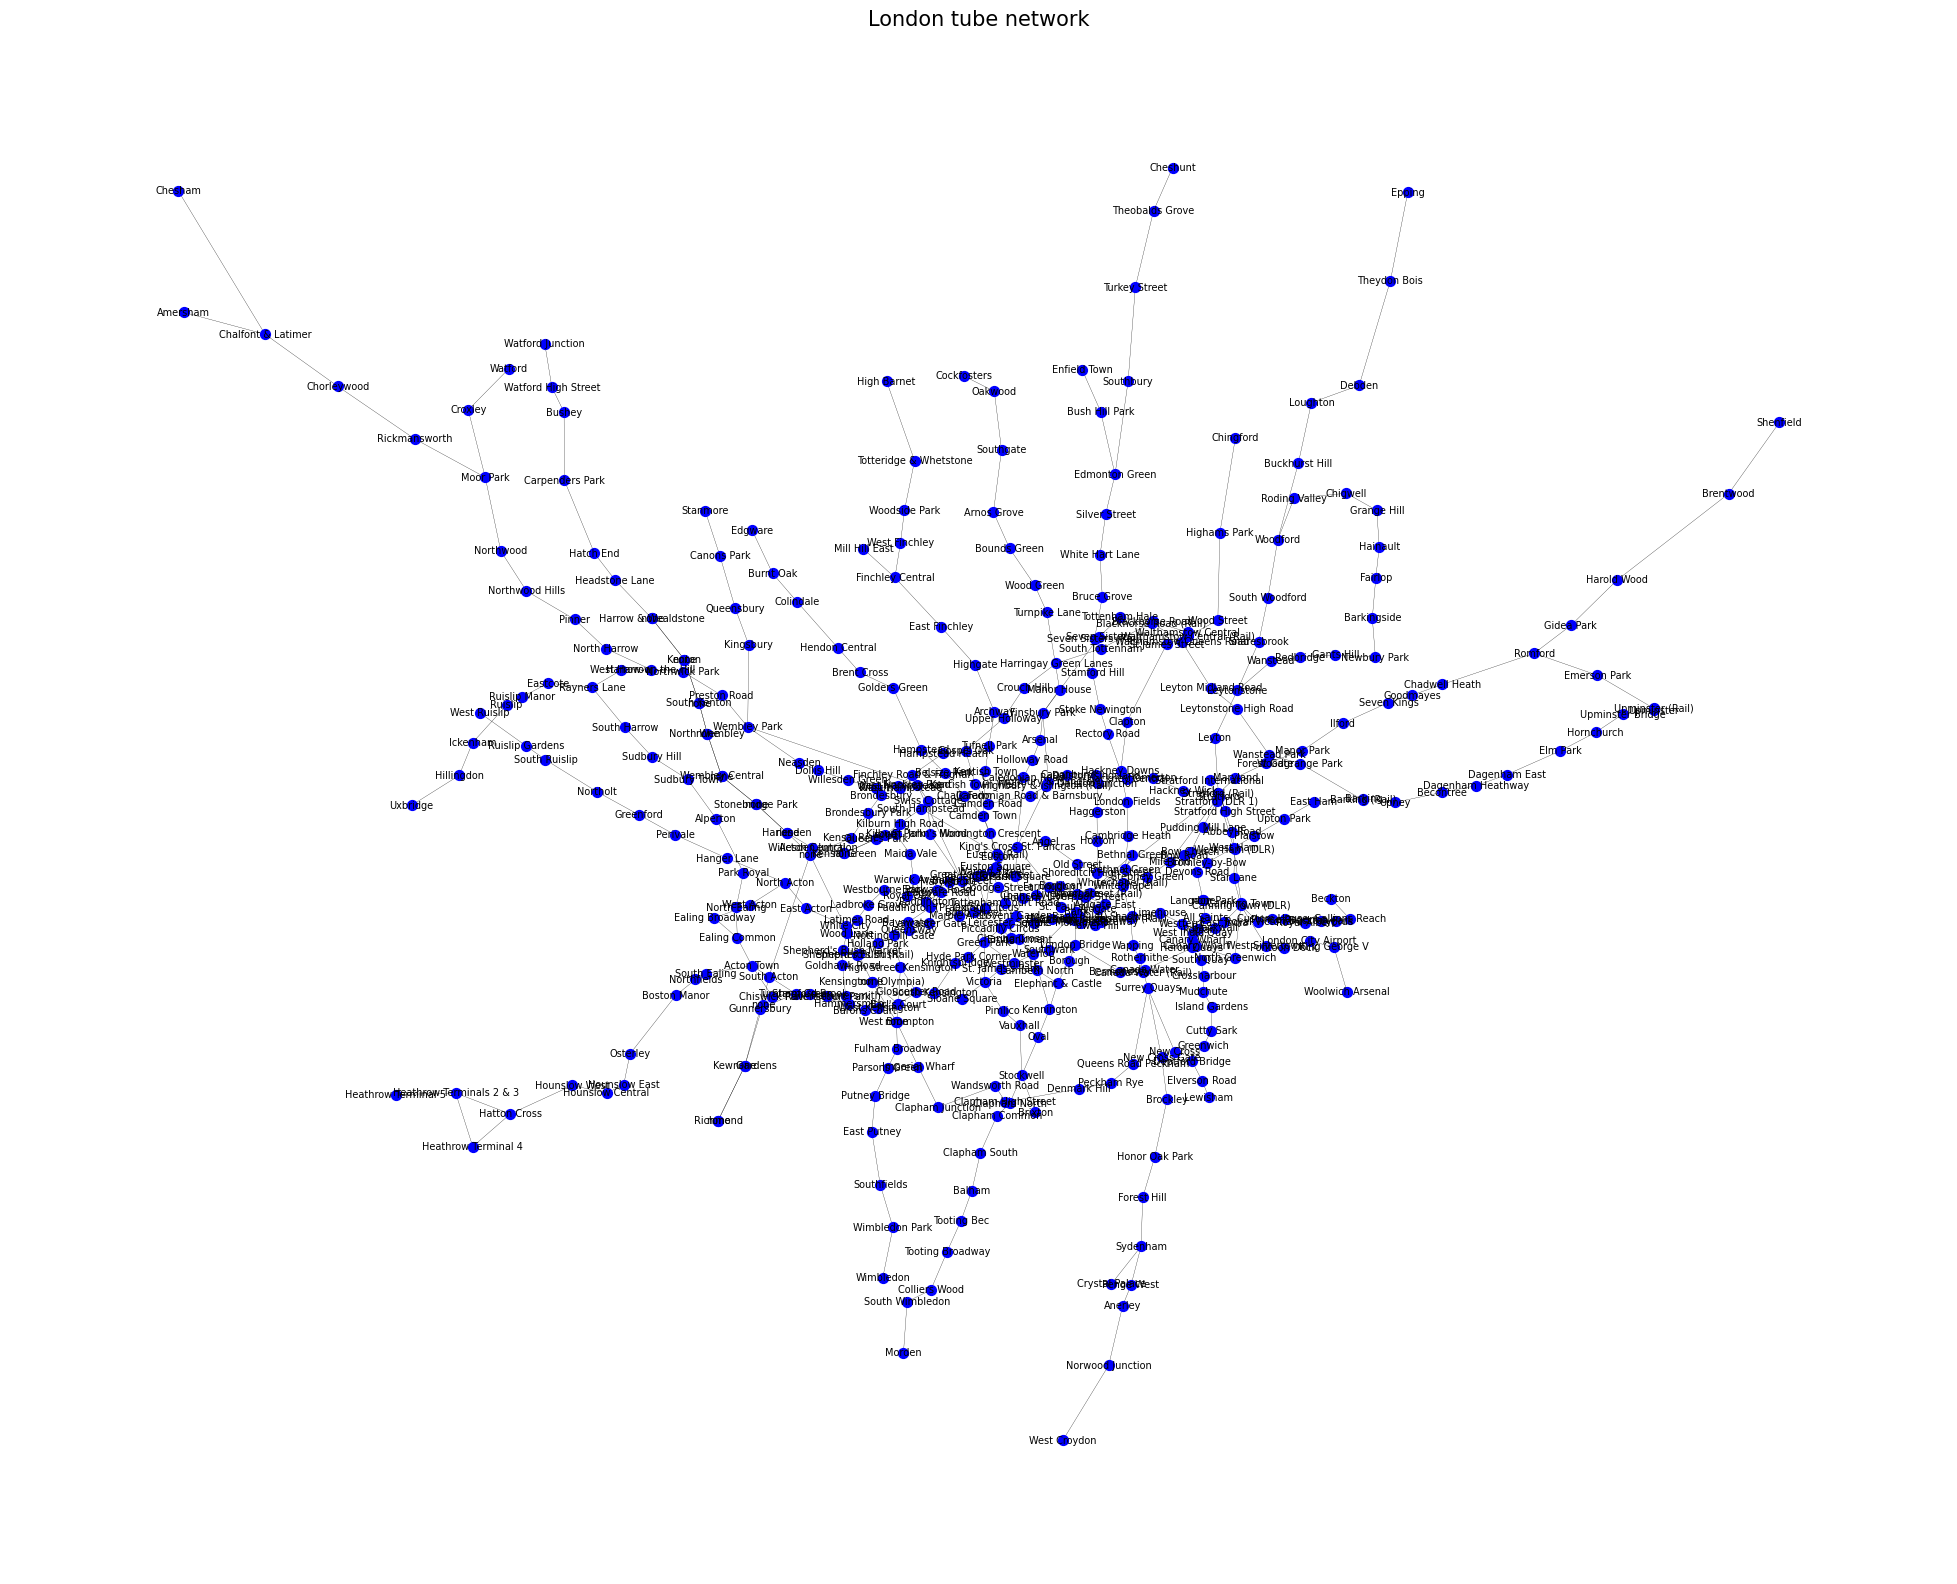

In [112]:
# plot the tube network! 

# plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=7, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [113]:
# select 3 centrality measures
# degree betwenness closeness
# give the results for the first 10 ranked nodes for each of the 3 measures.
degs = dict(nx.degree(G))
bc = dict(nx.betweenness_centrality(G))
cc = dict(nx.closeness_centrality(G))

degs_sort = sorted(degs.items(), key=lambda x:-x[-1])
bc_sort = sorted(bc.items(), key=lambda x:-x[-1])
cc_sort = sorted(cc.items(), key=lambda x:-x[-1])

##### Degree centrality

In [114]:
#calculate the degree centrality using networkx function:

deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [115]:
# To dataframe using the nodes as the index

df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)

# save node degree informations
df_sorted.to_csv('Degree Centrality.csv')

df_sorted[0:10]

,station_name,degree
940GZZLUKSX,King's Cross St. Pancras,0.016018
940GZZLUBST,Baker Street,0.016018
940GZZLUOXC,Oxford Circus,0.013730
940GZZLUGPK,Green Park,0.013730
940GZZLUBNK,Bank,0.013730
940GZZLUECT,Earl's Court,0.013730
940GZZLUWLO,Waterloo,0.013730
940GZZLUTNG,Turnham Green,0.011442
940GZZDLCGT,Canning Town (DLR),0.011442
940GZZLULVT,Liverpool Street,0.011442


In [116]:
pos = nx.get_node_attributes(G, 'coords')

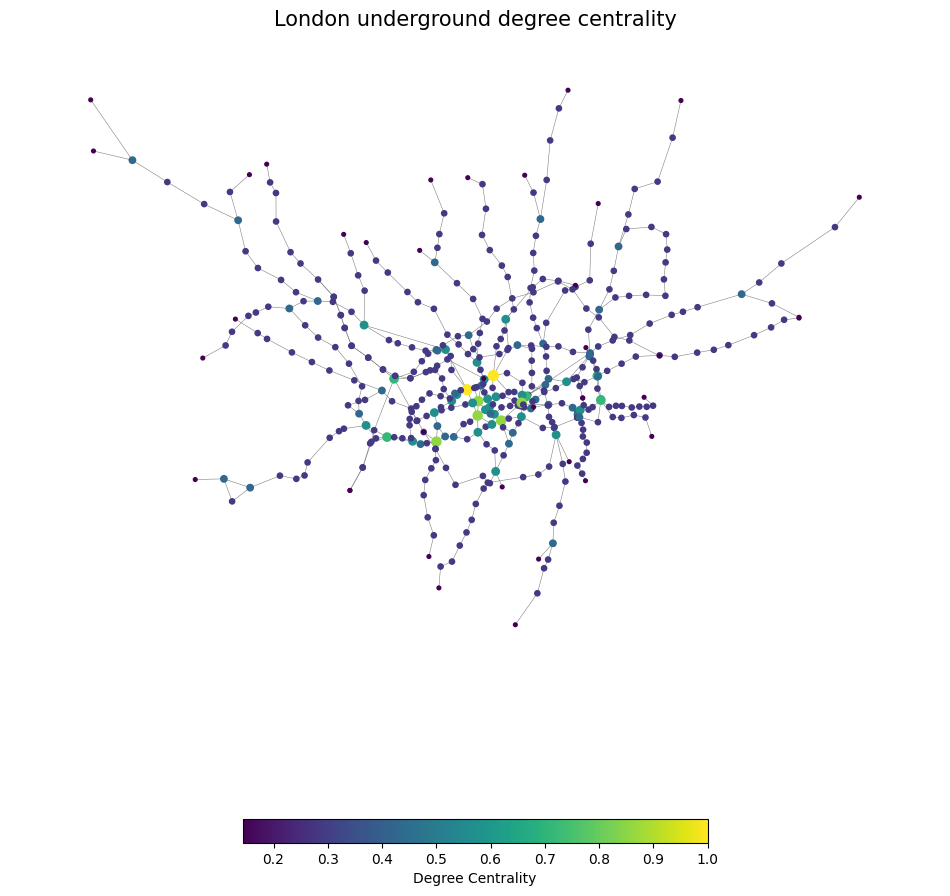

In [117]:
# set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]

# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground degree centrality",fontsize=15)
plt.show()

##### Between centrality

In [118]:
# betweenness centrality:
bet_london = nx.betweenness_centrality(G,normalized=False)
nx.set_node_attributes(G,bet_london,'betweenness')

In [119]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness'] = pd.Series(nx.get_node_attributes(G, 'betweenness'))

df_sorted = df.sort_values(["betweenness"], ascending=False)
df_sorted[0:10]

# save node betweenness informations
df_sorted.to_csv('Betweenness Centrality.csv')

df_sorted[0:10]

,station_name,betweenness
940GZZLUBST,Baker Street,36297.775794
940GZZLUBLG,Bethnal Green,33670.108333
940GZZLUFYR,Finchley Road,32064.800397
940GZZLUBNK,Bank,30443.441667
940GZZLUGPK,Green Park,30442.438095
940GZZLUWLO,Waterloo,30219.900000
940GZZLULVT,Liverpool Street,29820.741667
940GZZLUWSM,Westminster,27623.541667
940GZZLUBND,Bond Street,24635.653175
910GWHMDSTD,West Hampstead,22536.658333


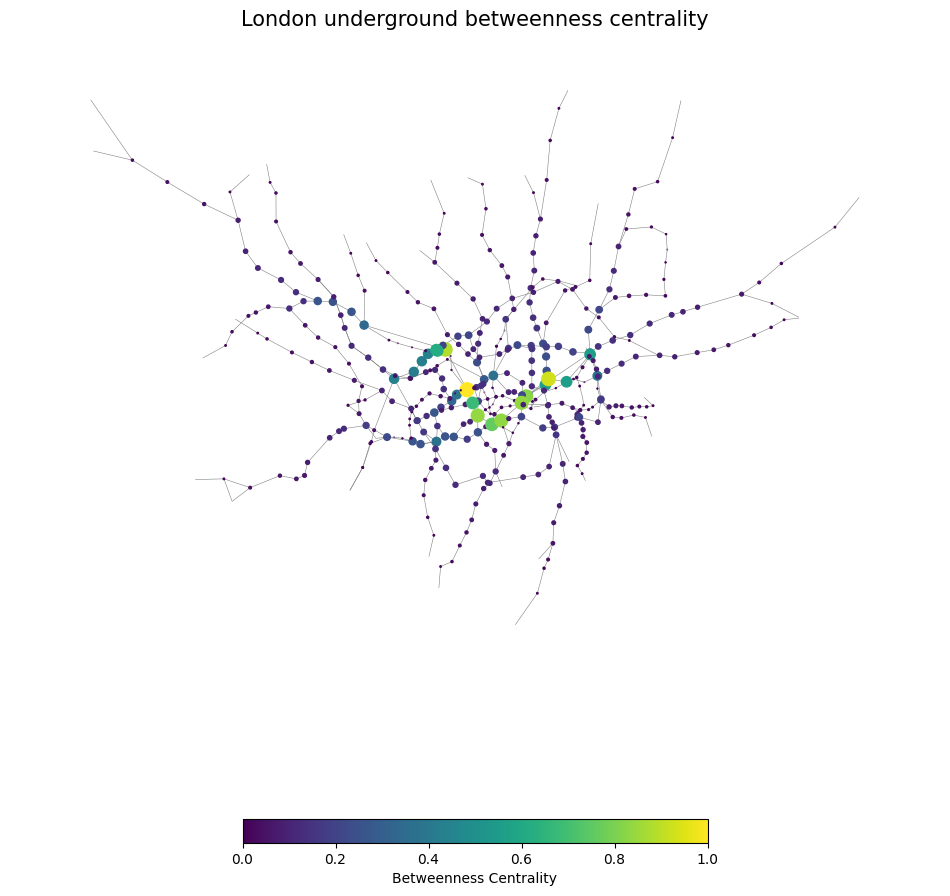

In [120]:
# set colour and size of nodes according to betweenness values
betweenness_values=[(i[1]['betweenness']) for i in G.nodes(data=True)]

bet_color=[(i[1]['betweenness']/max(betweenness_values)) for i in G.nodes(data=True)]
bet_size=[(i[1]['betweenness']/max(betweenness_values))*100 for i in G.nodes(data=True)]

# Plot graph
pos=pos

fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_color,
        node_size= bet_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground betweenness centrality",fontsize=15)
plt.show()

##### Closeness centrality

In [121]:
clos = nx.closeness_centrality(G)
# add these values to the nodes attributes:
nx.set_node_attributes(G,clos,'closeness')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness'] = pd.Series(nx.get_node_attributes(G, 'closeness'))

df_sorted = df.sort_values(["closeness"], ascending=False)
df_sorted[0:10]

# save node closeness informations
df_sorted.to_csv('Closeness Centrality.csv')

df_sorted[0:10]

,station_name,closeness
940GZZLUGPK,Green Park,0.094897
940GZZLUBND,Bond Street,0.093737
940GZZLUWSM,Westminster,0.093197
940GZZLUBST,Baker Street,0.092900
940GZZLUWLO,Waterloo,0.092389
940GZZLUBNK,Bank,0.092000
940GZZLUOXC,Oxford Circus,0.091614
940GZZLULVT,Liverpool Street,0.090010
940GZZLURGP,Regent's Park,0.089275
940GZZLUFYR,Finchley Road,0.089165


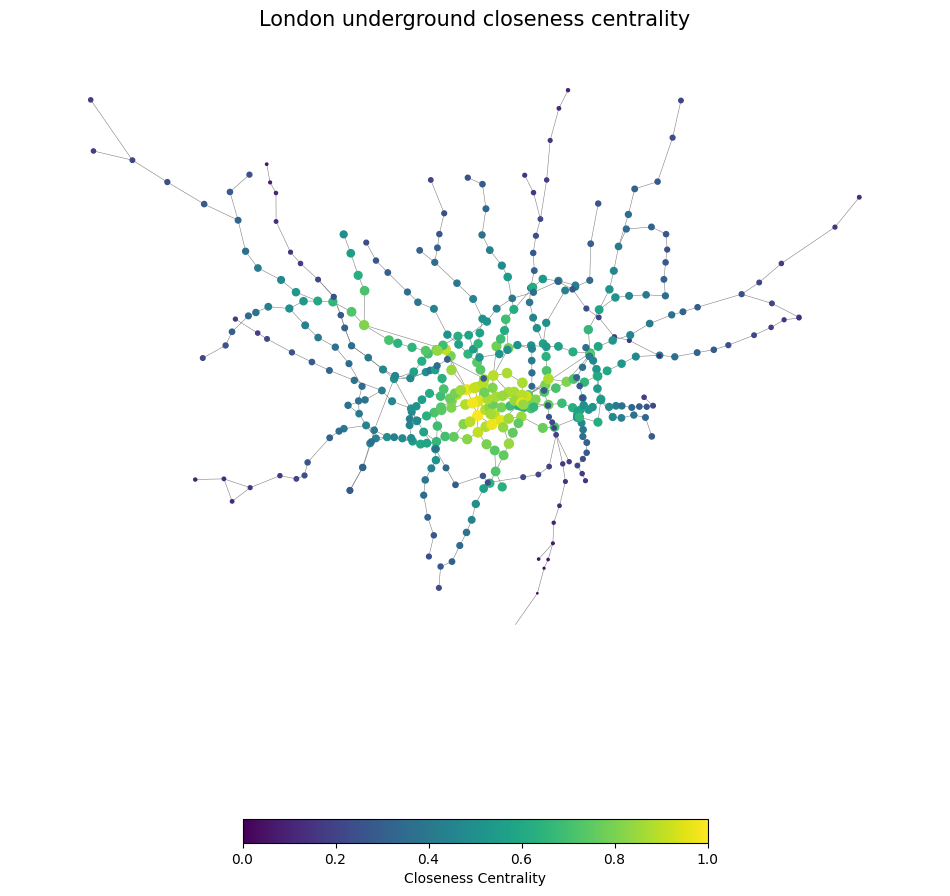

In [122]:
# set color and width of nodes according to the closeness values

clos_val=[(i[1]['closeness']) for i in G.nodes(data=True)]

closs_color=[(i[1]['closeness']-min(clos_val))/(max(clos_val)-min(clos_val)) for i in G.nodes(data=True)]
closs_size=[((i[1]['closeness']-min(clos_val))/(max(clos_val)-min(clos_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_color,
        node_size= closs_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground closeness centrality",fontsize=15)
plt.show()

#### I.2. Impact measures:
Find 2 different measures to evaluate the impact of the node removal on the network. These need to
be global measures referring to the whole network and not to specific nodes or links. Explain whether
these two measures are specific to the London underground, or whether they could also be used to
evaluate the resilience of any other network.

##### Network Efficiency

In [123]:
G2=G

In [124]:
def cal_network_efficiency(G2,N):

    e = 0
    nodes = list(G2.nodes())

    if len(nodes) < 2:
        return 0

    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if i != j:
                try:
                    d = nx.shortest_path_length(G2, nodes[i], nodes[j])
                    e += 1/d
                except:
                    d = 0
                    e += 0

    E = e / (N*(N-1))

    return E

In [125]:
N = len(G2.nodes())

efficiency = cal_network_efficiency(G2,N)
print("Network Efficiency:", efficiency)

Network Efficiency: 0.08135196743399546


##### Largest connected component

In [126]:
def cal_largest_connected_component(G2,N):

    nums = [len(c) for c in sorted(nx.connected_components(G2), key=len, reverse=True)]

    if len(nums):
        return nums[0] / N
    else:
        return 0

#### I.3. Node removal:
For each of the centrality measures selected in I.1. remove at least 10 nodes following two different
strategies. A) Non-sequential removal: using the table created in I.1. remove 1 node at a time
following the rank in the table, i.e. from the most important one to the 10th most important one. After
each removal, evaluate the impact of the removal using your two measures in I.2. and proceed until
you have removed at least 10 nodes. B) Sequential: remove the highest ranked node and evaluate the
impact using the 2 measures. After removal, re-compute the centrality measure. Remove the highest
ranked node in the new network and evaluate the impact. Continue until removing at least 10 nodes.
Report the results of the 2 strategies in one plot, and critically discuss the following: which centrality
measure reflects better the importance of a station for the functioning of the underground, which
strategy is more effective at studying resilience, and which impact measure is better at assessing the
damage after node removal. 

##### non-sequential

In [127]:
# remove nodes non-sequential

def att_node(G1,nodes_sort):
    '''
    node removal non-sequential
    '''

    G = G1.copy()

    res_con = []
    res_eff = []
    N = len(G.nodes())
    e0 = cal_network_efficiency(G,N)
    res_eff.append(e0)
    n0 = cal_largest_connected_component(G, N)
    res_con.append(n0) 

    for node in nodes_sort:

        G.remove_node(node)

        e = cal_network_efficiency(G,N)
        res_eff.append(e)

        n = cal_largest_connected_component(G, N)
        res_con.append(n) 

    return res_con,res_eff

In [128]:
# Plot

def show_node_attack(data_d, data_b, data_c, ylabel, filename):
    '''
    显示
    '''
    x1 = [i for i in range(len(data_d))]
    x2 = [i for i in range(len(data_b))]
    x3 = [i for i in range(len(data_c))]


    plt.figure(figsize=(14,9))

    plt.plot(x1,data_d,label='Degree Centrality', marker='o')
    plt.plot(x2,data_b,label='Betweenness Centrality', marker='o')
    plt.plot(x3,data_c,label='Closeness Centrality', marker='o')
    

    plt.tick_params(labelsize=30)
    plt.legend(fontsize=25)
    plt.xlabel('num',fontsize=28)
    plt.ylabel(ylabel,fontsize=28)
    plt.savefig(filename)


In [129]:
def get_nodes_centrality(filename):
    '''
    get London's underground station centrality
    '''
    datas = pd.read_csv(filename, header=0, index_col=None)
    datas = np.array(datas)
    datas = datas.tolist()

    dicts = {}
    for data in datas:
        dicts[data[0]] = data[2]

    return dicts

In [130]:
dc = get_nodes_centrality("Degree Centrality.csv")
bc = get_nodes_centrality("Betweenness Centrality.csv")
cc = get_nodes_centrality("Closeness Centrality.csv")

In [131]:
dc_sort = sorted(dc.items(), key=lambda x:-x[-1])
bc_sort = sorted(bc.items(), key=lambda x:-x[-1])
cc_sort = sorted(cc.items(), key=lambda x:-x[-1])

In [132]:
dc_sort_node = [k for k,v in dc_sort]
bc_sort_node = [k for k,v in bc_sort]
cc_sort_node = [k for k,v in cc_sort]

num_of_remove_nodes = 10

dc_con, dc_eff = att_node(G, dc_sort_node[:num_of_remove_nodes])
cc_con, cc_eff = att_node(G, cc_sort_node[:num_of_remove_nodes])
bc_con, bc_eff = att_node(G, bc_sort_node[:num_of_remove_nodes])

In [152]:
# Plot

def show_node_attack2 (data_d, data_b, data_c, data_e, data_f, data_g, ylabel, filename):
    '''
    显示
    '''
    x1 = [i for i in range(len(data_d))]
    x2 = [i for i in range(len(data_b))]
    x3 = [i for i in range(len(data_c))]
    x4 = [i for i in range(len(data_e))]
    x5 = [i for i in range(len(data_f))]
    x6 = [i for i in range(len(data_g))]

    plt.figure(figsize=(14,9))

    plt.plot(x1,data_d,label='Degree Centrality(Sequential)', marker='o', color='b')
    plt.plot(x2,data_b,label='Betweenness Centrality(Sequential)', marker='o', color='orange')
    plt.plot(x3,data_c,label='Closeness Centrality(Sequential)', marker='o', color='g')
    
    plt.plot(x4,data_e,label='Degree Centrality(Non-Sequential)', marker='o', linestyle='--', color='b')
    plt.plot(x5,data_f,label='Betweenness Centrality(Non-Sequential)', marker='o', linestyle='--', color='orange')
    plt.plot(x6,data_g,label='Closeness Centrality(Non-Sequential)', marker='o', linestyle='--', color='g')    

    plt.tick_params(labelsize=30)
    plt.legend(fontsize=12)
    plt.xlabel('Remove Node Number',fontsize=20)
    plt.ylabel(ylabel,fontsize=20)
    plt.savefig(filename)


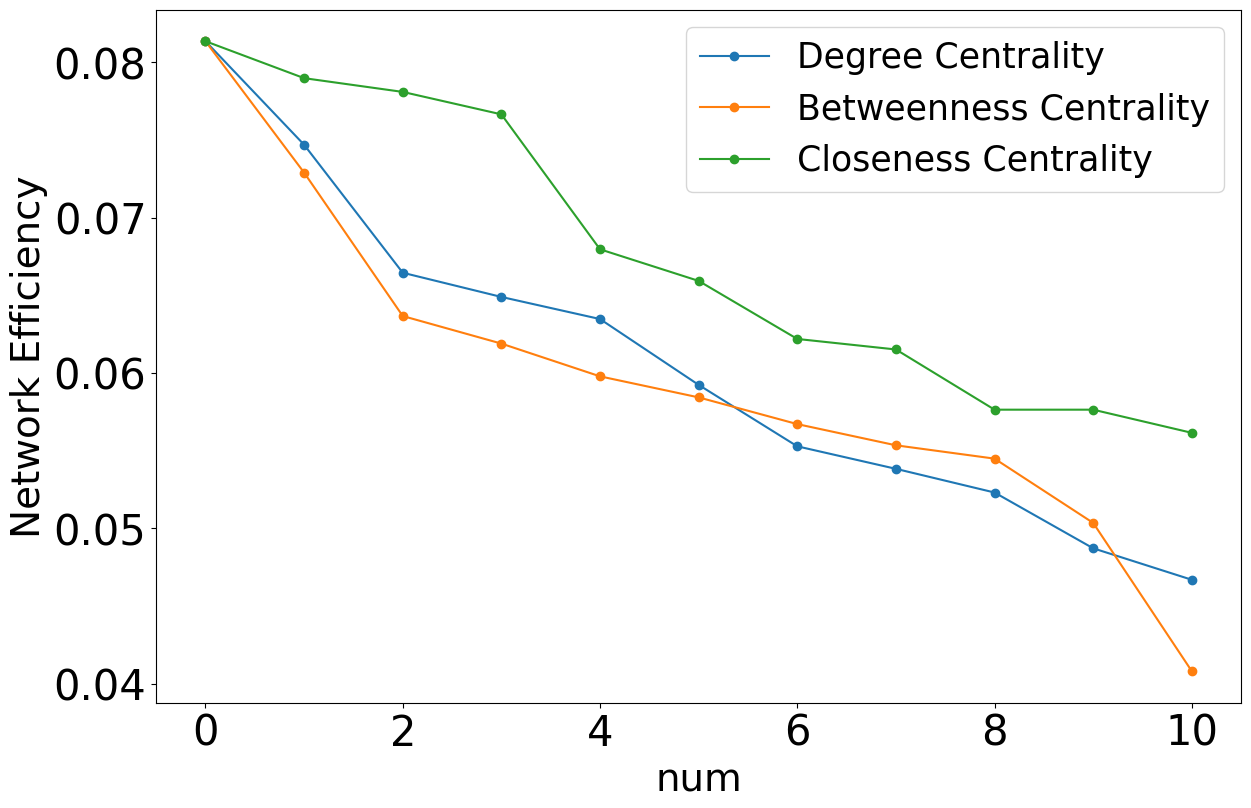

In [139]:
show_node_attack(dc_eff, bc_eff, cc_eff, 'Network Efficiency', 'network efficiency.png')

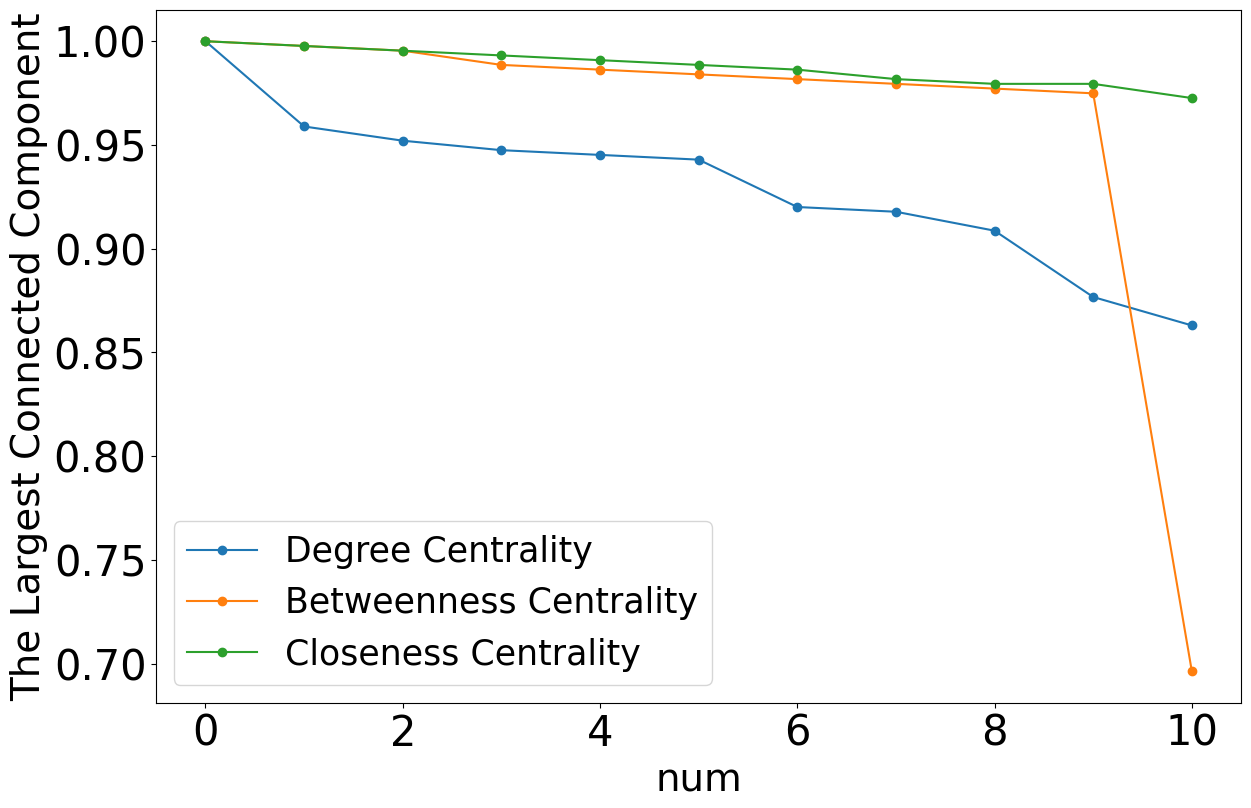

In [134]:
show_node_attack(dc_con, bc_con, cc_con, 'The Largest Connected Component', 'The largest connected component.png')

##### Sequencial

In [32]:
def att_node_sequential(G1,KKK,att_name):

    G = G1.copy()

    record_nodes = []

    res_con = []
    res_eff = []
    N = len(G.nodes())
    e0 = cal_network_efficiency(G,N)
    res_eff.append(e0)
    n0 = cal_largest_connected_component(G, N)
    res_con.append(n0) 

    for i in range(KKK):

        if att_name == 'DC':
            dicts = dict(nx.degree(G))
            nodes_sort = [k for k,v in sorted(dicts.items(), key=lambda x:-x[-1])]
        elif att_name == 'CC':
            dicts = dict(nx.closeness_centrality(G))
            nodes_sort = [k for k,v in sorted(dicts.items(), key=lambda x:-x[-1])]
        elif att_name == 'BC':
            dicts = dict(nx.betweenness_centrality(G))
            nodes_sort = [k for k,v in sorted(dicts.items(), key=lambda x:-x[-1])]
        else:
            raise NameError('输入有误')

        node = nodes_sort[0]

        G.remove_node(node)
        record_nodes.append(node)

        e = cal_network_efficiency(G,N)
        res_eff.append(e)

        n = cal_largest_connected_component(G, N)
        res_con.append(n)  




    return res_con,res_eff, record_nodes

In [33]:
se_dc_con, se_dc_eff, se_dc_nodes = att_node_sequential(G, num_of_remove_nodes,'DC')

se_cc_con, se_cc_eff,se_cc_nodes = att_node_sequential(G, num_of_remove_nodes,'CC')

se_bc_con, se_bc_eff,se_bc_nodes = att_node_sequential(G, num_of_remove_nodes, "BC")

In [34]:
# Plot

def show_node_attack_sequential(data_d, data_b, data_c, ylabel, filename):
    '''
    显示
    '''
    x1 = [i for i in range(len(data_d))]
    x2 = [i for i in range(len(data_b))]
    x3 = [i for i in range(len(data_c))]


    plt.figure(figsize=(14,9))

    plt.plot(x1,data_d,label='Degree Centrality', marker='x')
    plt.plot(x2,data_b,label='Betweenness Centrality', marker='x')
    plt.plot(x3,data_c,label='Closeness Centrality', marker='x')
    

    plt.tick_params(labelsize=30)
    plt.legend(fontsize=25)
    plt.xlabel('num',fontsize=28)
    plt.ylabel(ylabel,fontsize=28)
    plt.savefig(filename)

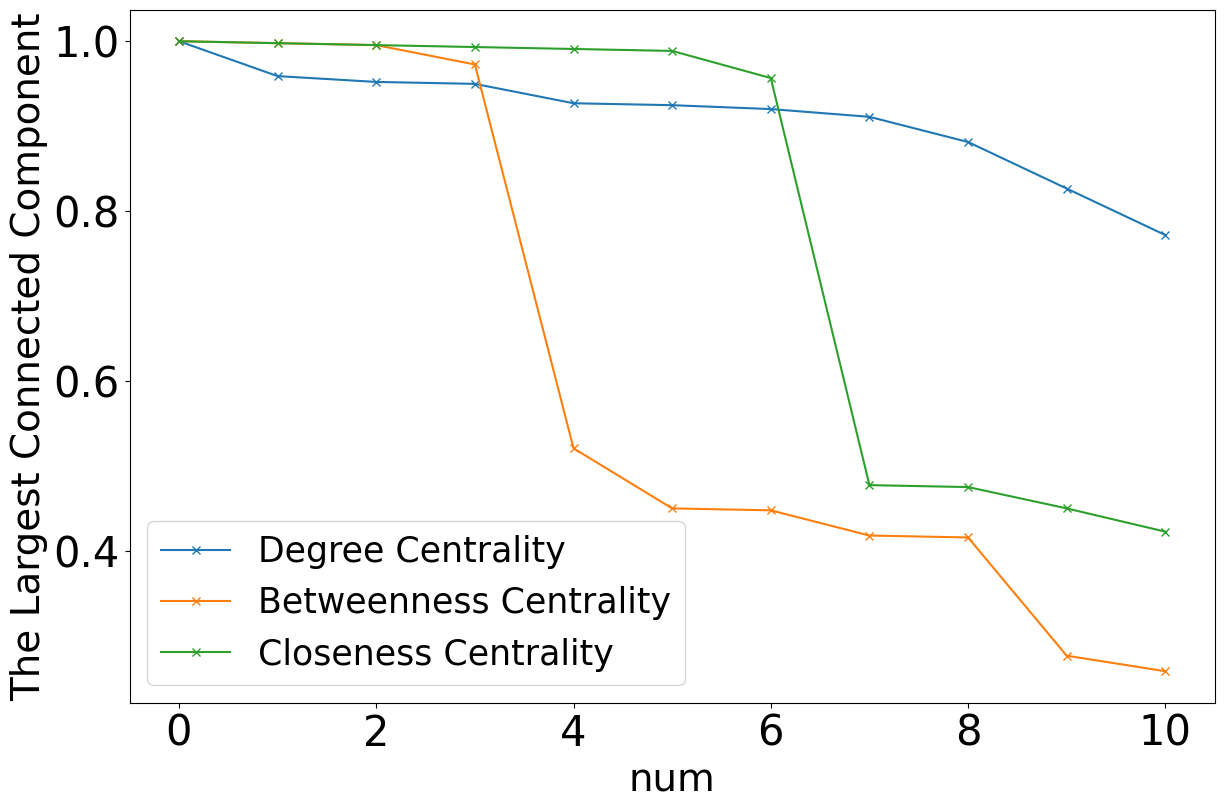

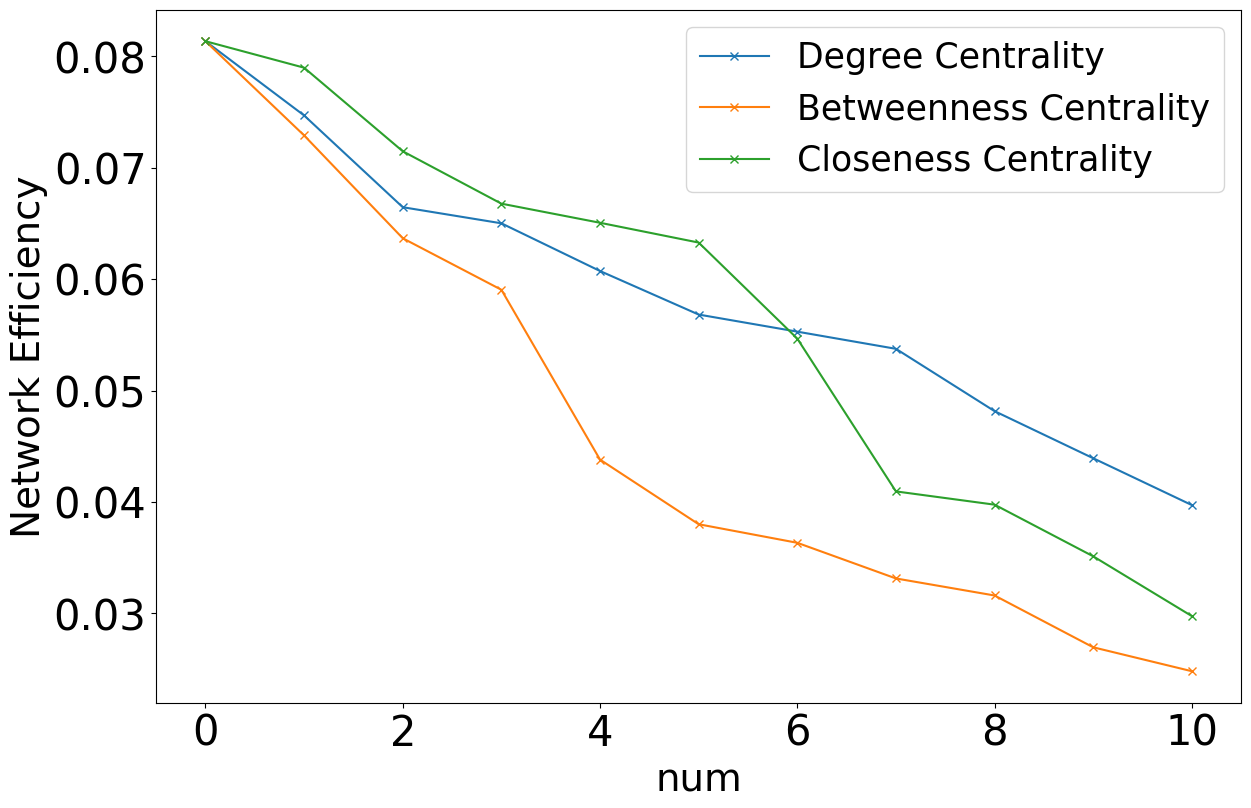

In [35]:
show_node_attack_sequential(se_dc_con, se_bc_con, se_cc_con, 'The Largest Connected Component', 'largest_connected component_sequential.png')
show_node_attack_sequential(se_dc_eff, se_bc_eff, se_cc_eff, 'Network Efficiency', 'network_efficiency_sequential.png')

In [ ]:
show_node_attack2(dc_eff, bc_eff, cc_eff, se_dc_eff, se_bc_eff, se_cc_eff, 'Network Efficiency', 'network efficiency.png')
show_node_attack2(dc_con, bc_con, cc_con, se_dc_con, se_bc_con, se_cc_con, 'The Largest Connected Component', 'The largest connected component.png')

### II. Flows: weighted network
In this section, you will include passengers into the underground, and assess whether different
measures need to be used when flows are considered. The network to use in this section is the
weighted network given to you in the coursework, where the flows of passengers were assigned to the
links between stations.

#### II.1. 
Consider the centrality measure derived in I. indicating the most relevant stations for assessing
the vulnerability of the underground. What would you need to do to adjust this measure for a
weighted network? Recompute the ranking of the 10 most important nodes according to this adjusted
measure. Do you find the same ones as in I.1?

In [36]:
# data wrangling

files = ['NBT19MTT2b_od__DLR_tb_wf.csv', 
         'NBT19MTT2b_od__EZL_tb_wf.csv', 
         'NBT19MTT2b_od__LO_tb_wf.csv', 
         'NBT19MTT2b_od__LU_tb_wf.csv']

dfs = []

for file in files:
    dfs.append(pd.read_csv(file))
    
london_OD = pd.concat(dfs, ignore_index=True)

definition_df = pd.read_excel('NBT19_Definitions_Published.xlsx', 'Stations')

#we will drop any missing values from our dataframe
definition_df.dropna(inplace=True)

#transform mnlc codes from floats to int
definition_df.MNLC = definition_df.MNLC.astype(int)

#add the station names
london_OD['station_origin'] = london_OD['mode_mnlc_o'].apply(lambda x: definition_df[definition_df.MNLC==x]['StationName'].values[0])
london_OD['station_destination'] = london_OD['mode_mnlc_d'].apply(lambda x: definition_df[definition_df.MNLC==x]['StationName'].values[0])

london_OD.head()

,mode_mnlc_o,mode_mnlc_d,2,3,4,5,6,7,mode,1,8,station_origin,station_destination
0,504,523,8.033,16.430,24.563,28.555,13.023,2.263,DLR,NaN,NaN,Stratford International DLR,King George V
1,504,533,30.719,40.105,61.571,57.881,15.573,0.317,DLR,NaN,NaN,Stratford International DLR,London City Airport
2,504,538,5.941,17.238,37.493,43.158,33.890,10.429,DLR,NaN,NaN,Stratford International DLR,Pontoon Dock
3,504,559,5.795,26.397,27.285,24.065,15.213,8.508,DLR,NaN,NaN,Stratford International DLR,West Silvertown
4,504,573,77.786,113.750,143.938,387.562,165.776,65.283,DLR,NaN,NaN,Stratford International DLR,Woolwich Arsenal


In [37]:
# keep timeband flows

london_OD_AMpeak = london_OD[['station_origin', 'station_destination', '3']].copy()
london_OD_AMpeak.rename({'3':'flows'}, axis=1, inplace=True)
london_OD_AMpeak.flows = london_OD_AMpeak.flows.astype(int)

london_OD_AMpeak.head()

,station_origin,station_destination,flows
0,Stratford International DLR,King George V,16
1,Stratford International DLR,London City Airport,40
2,Stratford International DLR,Pontoon Dock,17
3,Stratford International DLR,West Silvertown,26
4,Stratford International DLR,Woolwich Arsenal,113


In [38]:
# get station names 

station_origin = list(london_OD_AMpeak.station_origin.values)
station_destination = list(london_OD_AMpeak.station_destination.values)
all_stations = list(set(station_origin + station_destination))
all_stations = sorted(all_stations, key=str.lower)

all_stations

['Abbey Road',
 'Acton Central',
 'Acton Main Line',
 'Acton Town',
 'Aldgate',
 'Aldgate East',
 'All Saints',
 'Alperton',
 'Amersham',
 'Anerley',
 'Angel',
 'Archway',
 'Arnos Grove',
 'Arsenal',
 'Baker Street',
 'Balham LU',
 'Bank and Monument',
 'Barbican',
 'Barking',
 'Barkingside',
 'Barons Court',
 'Battersea Park',
 'Bayswater',
 'Beckton',
 'Beckton Park',
 'Becontree',
 'Belsize Park',
 'Bermondsey',
 'Bethnal Green LO',
 'Bethnal Green LU',
 'Blackfriars LU',
 'Blackhorse Road',
 'Blackwall',
 'Bond Street',
 'Borough',
 'Boston Manor',
 'Bounds Green',
 'Bow Church',
 'Bow Road',
 'Brent Cross',
 'Brentwood',
 'Brixton LU',
 'Brockley',
 'Bromley-by-Bow',
 'Brondesbury',
 'Brondesbury Park',
 'Bruce Grove',
 'Buckhurst Hill',
 'Burnt Oak',
 'Bush Hill Park',
 'Bushey',
 'Caledonian Road',
 'Caledonian Road & Barnsbury',
 'Cambridge Heath',
 'Camden Road',
 'Camden Town',
 'Canada Water',
 'Canary Wharf DLR',
 'Canary Wharf LU',
 'Canning Town',
 'Cannon Street LU',
 'C

In [39]:
london_OD_AMpeak['station_origin']= london_OD_AMpeak.station_origin.apply(lambda x: 
                                      re.sub('\sLU\s?|\sLO\s?|\sNR\s?|\sTf[lL]\s?|\sDLR\s?|\s\(.*\)', '', x)
                                     )
london_OD_AMpeak['station_destination']=london_OD_AMpeak.station_destination.apply(lambda x: 
                                      re.sub('\sLU\s?|\sLO\s?|\sNR\s?|\sTf[lL]\s?|\sDLR\s?|\s\(.*\)', '', x)
                                     )

In [40]:
london_OD_AMpeak = london_OD_AMpeak.groupby(['station_origin', 'station_destination']).sum().reset_index()

In [41]:
outflows = london_OD_AMpeak.groupby('station_origin').sum()
inflows = london_OD_AMpeak.groupby('station_destination').sum()

In [42]:
outflows.sort_values('flows').head(10)

,station_destination,flows
station_origin,,
Battersea Park,BrockleyCanada WaterClapham High StreetDalston...,0
West India Quay,All SaintsBank and MonumentBecktonBlackwallBow...,162
Cheshunt,BarkingBethnal GreenBruce GroveCambridge Heath...,171
Bushey,Acton CentralBarkingBrondesburyCarpenders Park...,238
Heathrow Terminals 2 & 3 EL,Ealing BroadwayHanwellHayes & HarlingtonHeathr...,242
South Hampstead,Acton CentralBusheyCarpenders ParkEustonGunner...,248
Shenfield,BrentwoodChadwell HeathForest GateGidea ParkGo...,248
Hyde Park Corner,Acton TownAldgateAldgate EastAlpertonAmershamA...,259
Beckton Park,Bank and MonumentBecktonBlackwallBow ChurchCan...,293


In [43]:
outflows.sort_values('flows').tail(10)

,station_destination,flows
station_origin,,
Paddington,Acton Main LineActon TownAldgateAldgate EastAl...,24071
Finsbury Park,Acton TownAldgateAldgate EastAlpertonAmershamA...,24735
Canada Water,Acton CentralActon TownAlpertonAmershamAnerley...,27026
King's Cross St. Pancras,Acton TownAldgateAldgate EastAlpertonAmershamA...,28307
Bank and Monument,Abbey RoadActon TownAldgateAldgate EastAll Sai...,29494
Liverpool Street,Acton TownAldgateAldgate EastAlpertonAmershamA...,31473
London Bridge,Acton TownAldgateAldgate EastAlpertonAmershamA...,32597
Victoria,Acton TownAldgateAldgate EastAlpertonAmershamA...,37517
Stratford,Abbey RoadActon CentralActon TownAldgateAldgat...,59311


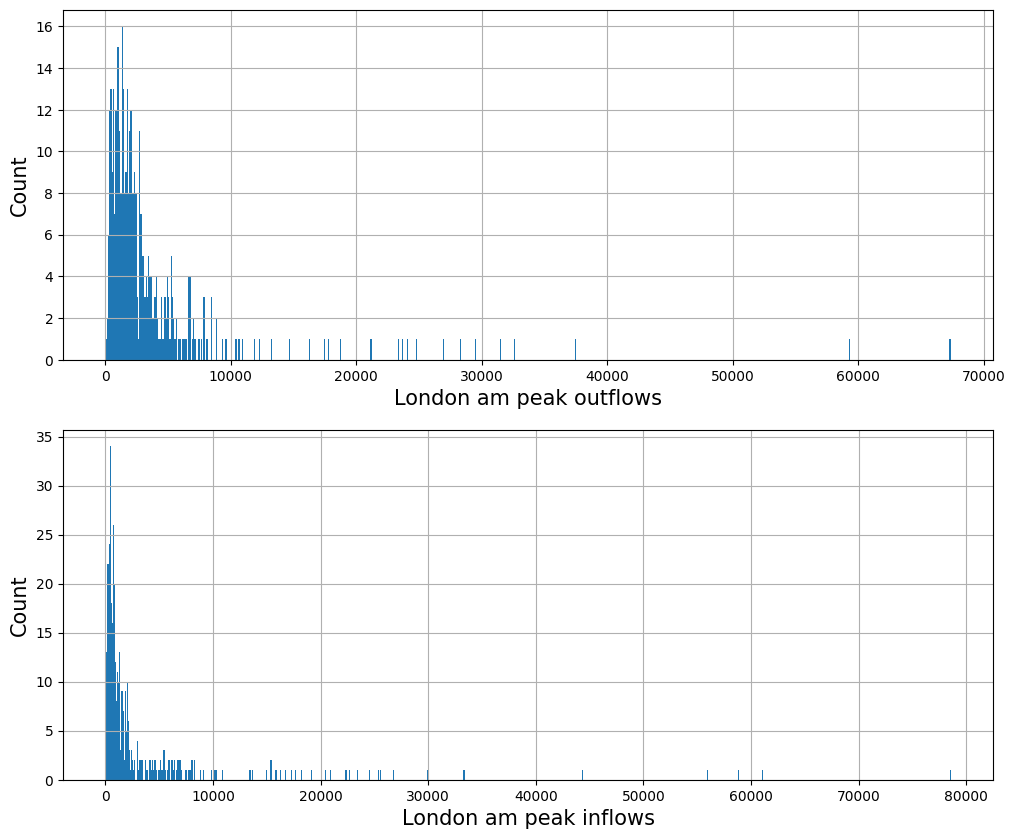

In [44]:
#let's plot this as a histogram
bin_size=100
fig, ax = plt.subplots(2,1,figsize=(12,10))
ax[0].hist(outflows['flows'], bins=int(outflows['flows'].max()/bin_size))
ax[0].set_xlabel('London am peak outflows', fontsize = 15)
ax[0].set_ylabel("Count", fontsize= 15)
ax[0].grid(True)

ax[1].hist(inflows['flows'], bins=int(inflows['flows'].max()/bin_size))
ax[1].set_xlabel('London am peak inflows', fontsize = 15)
ax[1].set_ylabel("Count", fontsize= 15)
ax[1].grid(True)
plt.show()

In [45]:
stations = gpd.read_file('tfl_stations.json')
lines = gpd.read_file('tfl_lines.json')

In [46]:
stations[stations['id'] == '940GZZLUSKS']

,id,name,nlc_id,lines,cartography,altmodeid,alt_id,altmodeid2,zone,geometry
210,940GZZLUSKS,South Kensington,0708,"[ { ""name"": ""District"" }, { ""name"": ""Circle"" }...","{'labelX': 1, 'labelY': 50, 'display_name': 'S...",None,233,None,1,POINT (-0.17290 51.49404)


In [47]:
stations = stations.to_crs(epsg = 27700)
lines = lines.to_crs(epsg = 27700)

In [48]:
#get all station names
station_names = {row.id: row['name'] for i, row in stations.iterrows()}

In [49]:
#clean station names
for k, v in station_names.items():
    if k == 'none':
        continue
    cleaned_name = re.sub('\sLU\s?|\sLO\s?|\sNR\s?|\sTf[lL]\s?|\sDLR\s?|\s\(.*\)', '', v)
    
    #note that bank and monument are enconded as one station in our TFL data, so we will do the same
    if cleaned_name in ['Bank', 'Monument']:
        cleaned_name = 'Bank and Monument'
    station_names[k] = cleaned_name
    
stations['name'] = stations['id'].apply(lambda x: station_names[x])

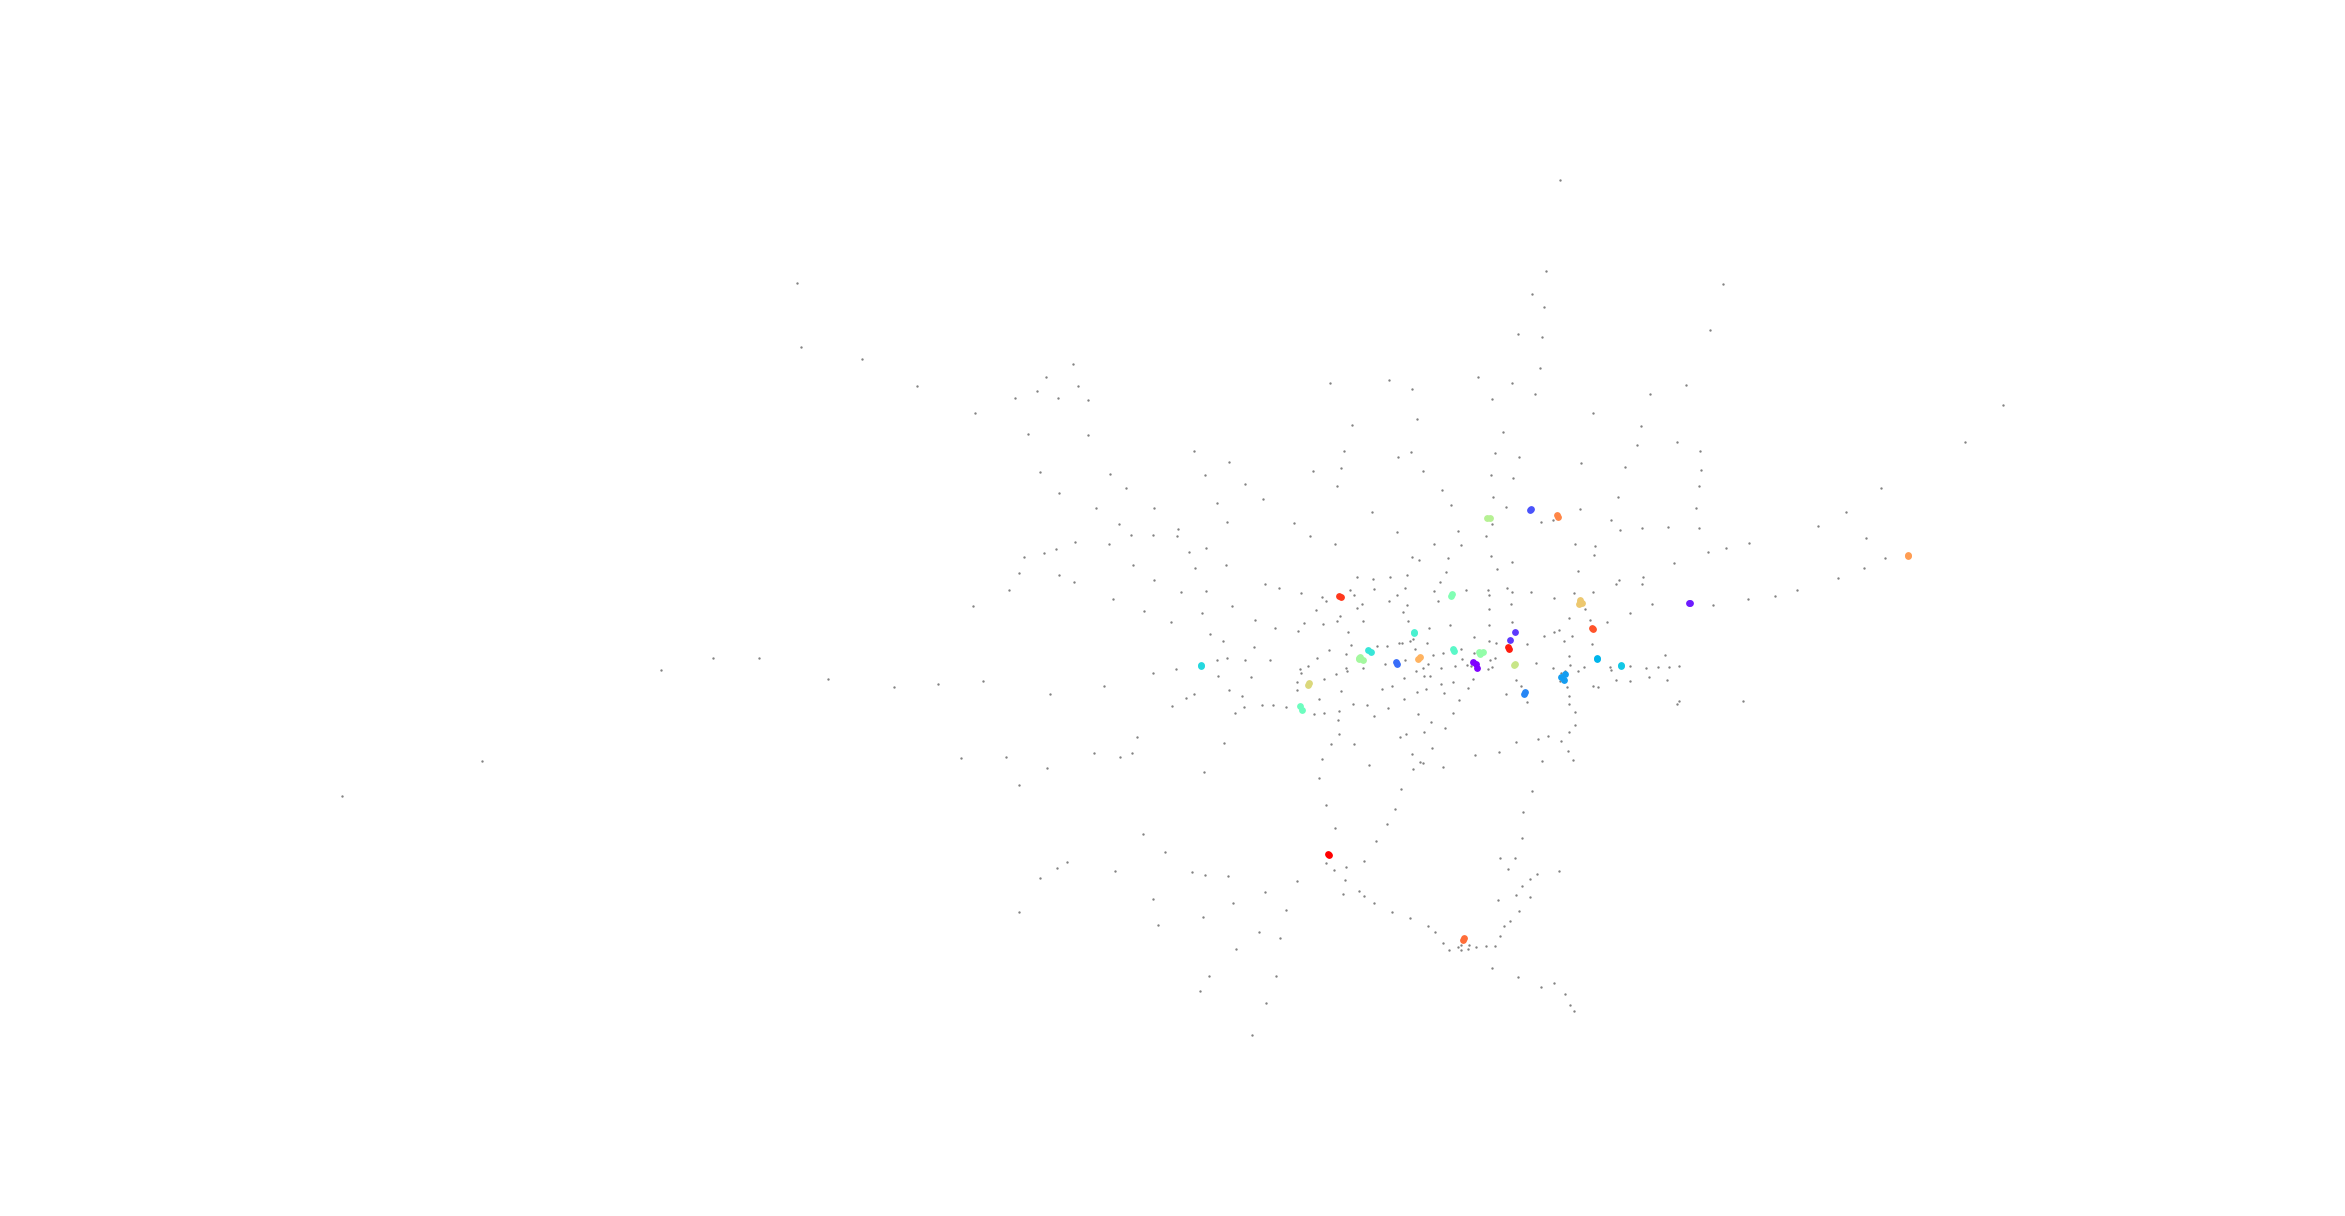

In [50]:
## we will plot all the stations with multiple points to check there are no errors
fig, ax = plt.subplots(figsize = (30,30))
ax.set_aspect("equal")
ax.axis('off')
ax.margins(0.2)
color = iter(cm.rainbow(np.linspace(0, 1, 29)))
stations.plot(ax=ax, color='grey', markersize=0.5)
for i, group in stations.groupby('name'):
    if len(group)>1:
        group.plot(ax=ax, color = next(color), markersize=15)
plt.show()

In [51]:
#get position of stations as mean of x, y of stations

#create empty dict to store list of coordinates
pos = {}

#iterate through the stations
for i, station in stations.iterrows():
    xy = station.geometry.coords[0]
    
    #if station already in dict add coordinate to coordinate list
    if station['name'] in pos.keys():
        pos[station['name']].extend([xy])
    #if station is not in the dict add station to dict and set first coordinate in list
    else:
        pos[station['name']] = [xy]

#iterate through our dict and replace coordinate list with mean value
for k, v in pos.items():
    #we set axis to 0 to make sure to take mean of x and y coordinates
    pos[k] = np.mean(v, axis=0)

In [52]:
#get all line types as a list and subset geoms by lines
line_names  = lines.lines.apply(lambda x: [x['name'] for x in json.loads(x)] )
line_names = list(set([item for sublist in line_names for item in sublist]))
line_names

['Thameslink 6tph line',
 'Crossrail 2',
 'London Overground',
 'East London',
 'District',
 'Tramlink',
 'Central',
 'Hammersmith & City',
 'Bakerloo',
 'TfL Rail',
 'Emirates Air Line',
 'Jubilee',
 'Waterloo & City',
 'DLR',
 'Victoria',
 'Piccadilly',
 'Metropolitan',
 'Crossrail',
 'Northern',
 'Circle']

In [53]:
#Our TFL data doesn't include tramlink, emirates air lines, and crossrail is still in construction
#exclude the lines that we are not going to use
excluded_lines = ['Thameslink 6tph line', 'East London', 'Crossrail 2', 'Emirates Air Line', 'Crossrail', 'Tramlink']


#merge East London line and London Overground since they are one line
lines.lines = lines.lines.str.replace('East London', 'London Overground')
stations.lines = stations.lines.str.replace('East London', 'London Overground')

London Overground


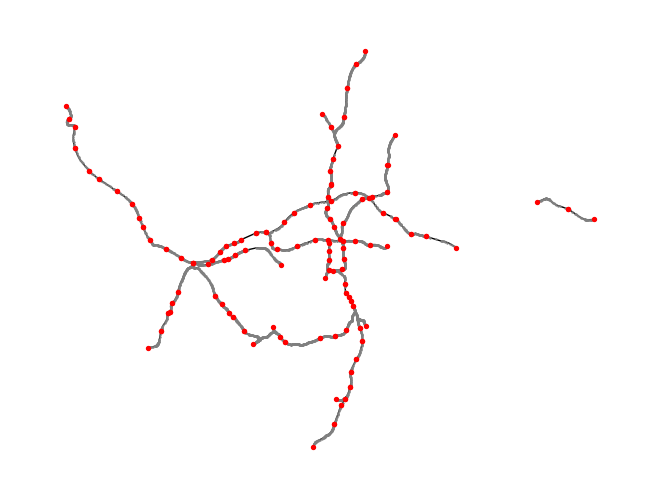

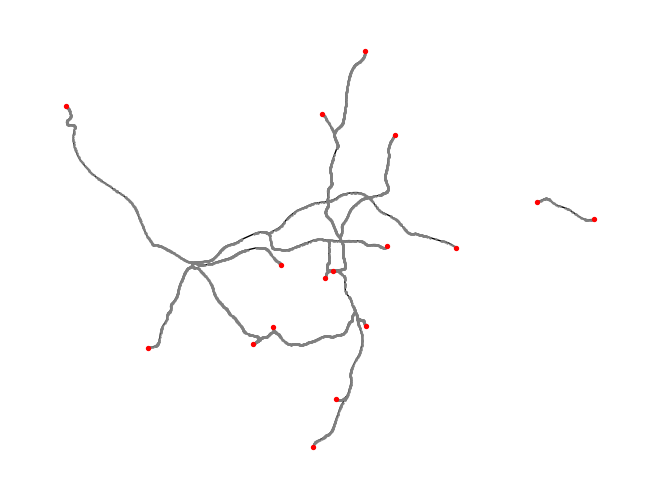

3
District


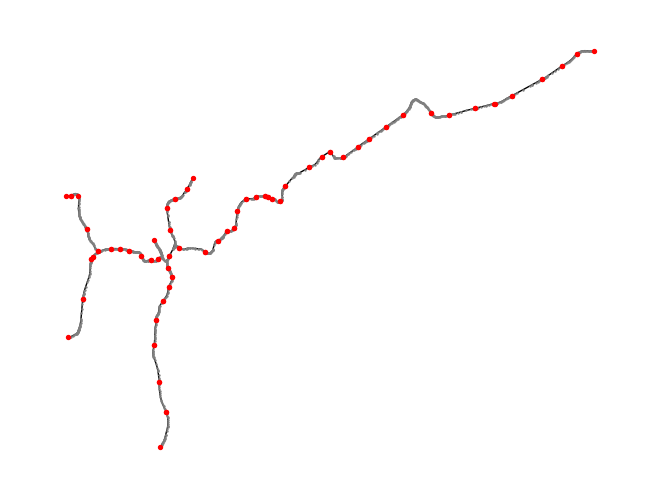

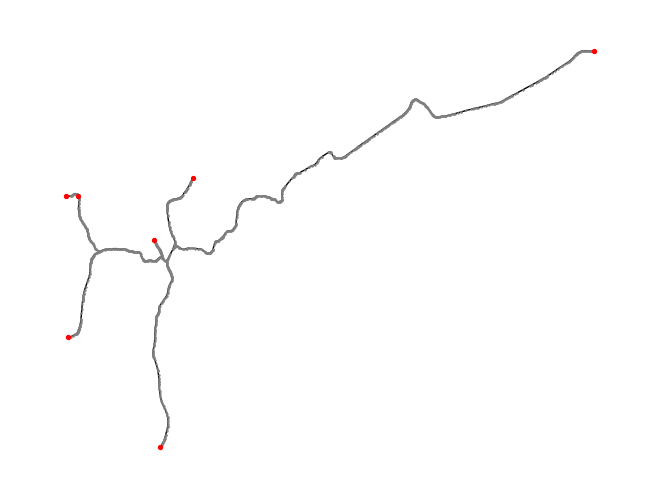

1
Central


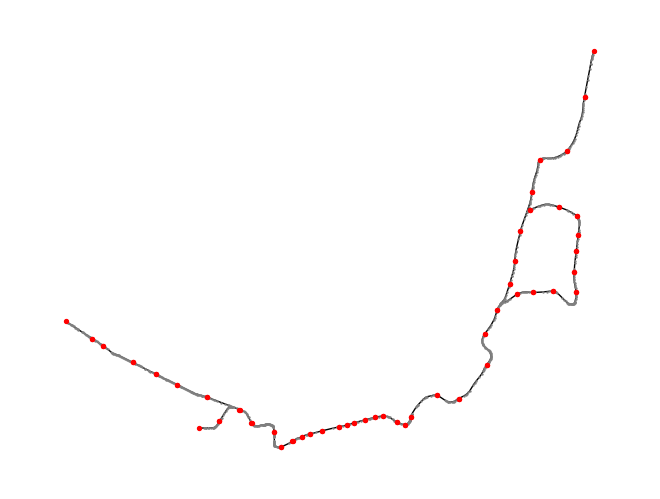

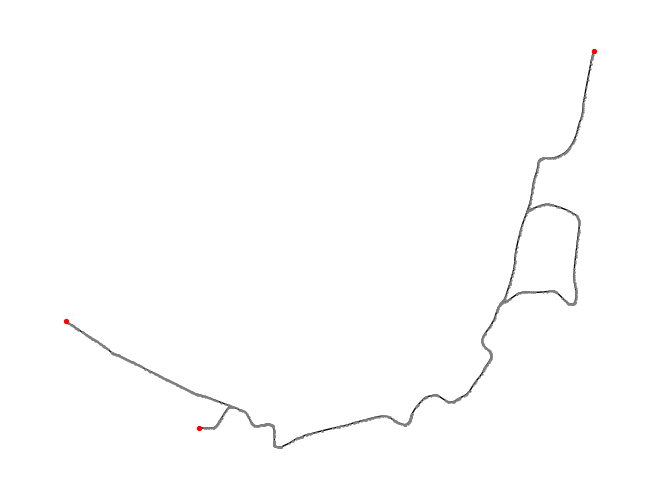

1
Hammersmith & City


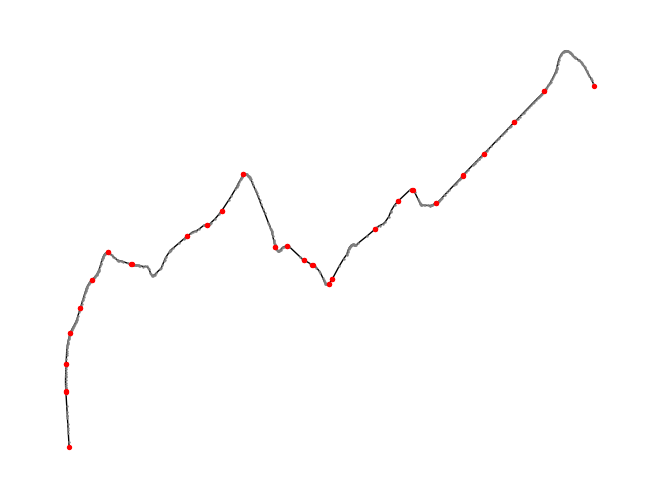

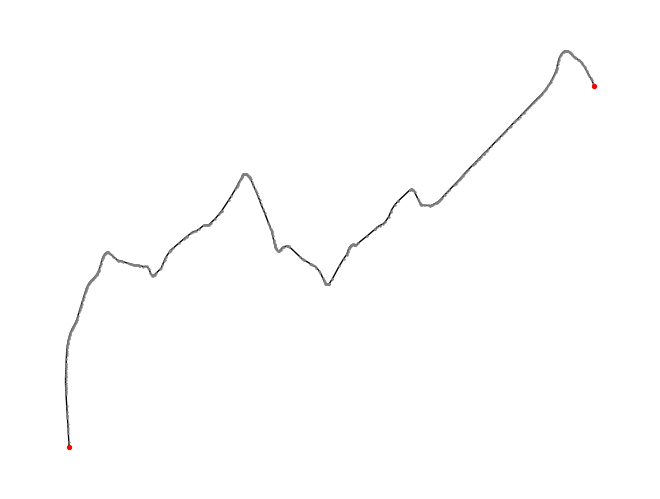

1
Bakerloo


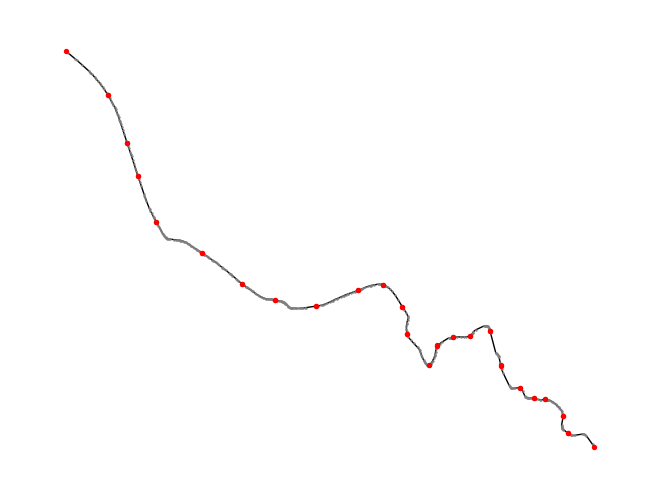

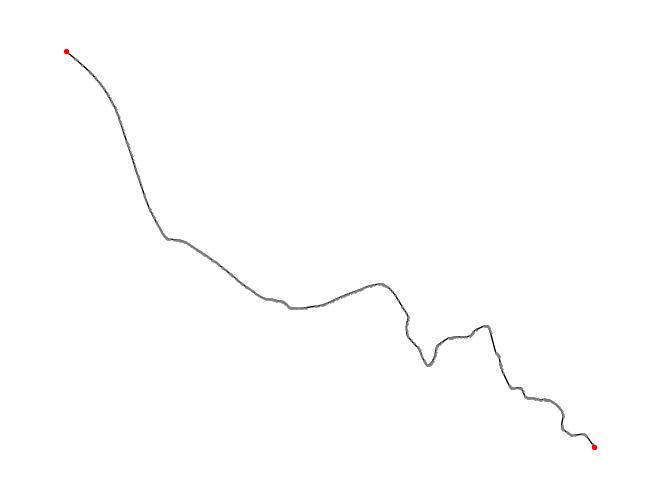

1
TfL Rail


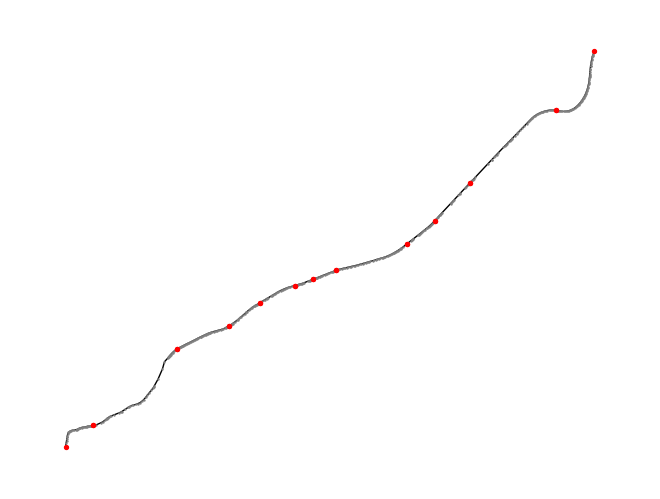

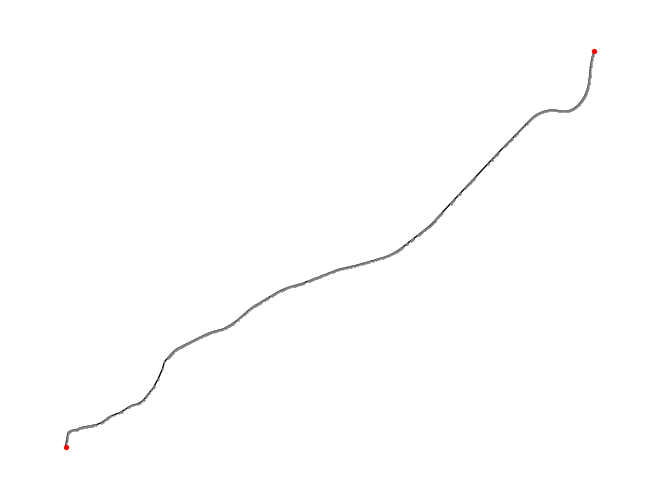

1
Jubilee


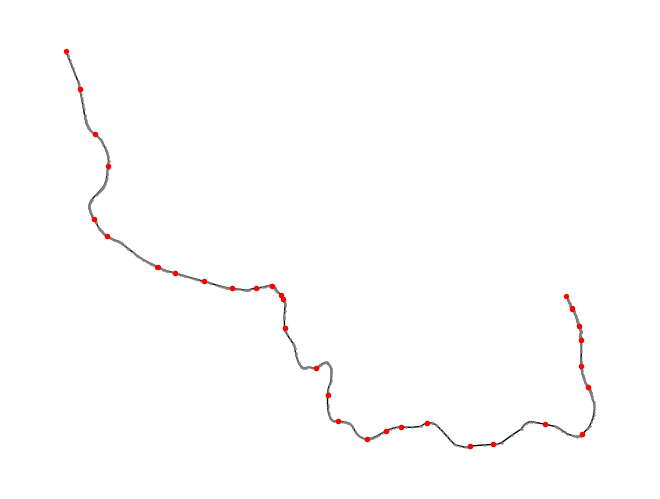

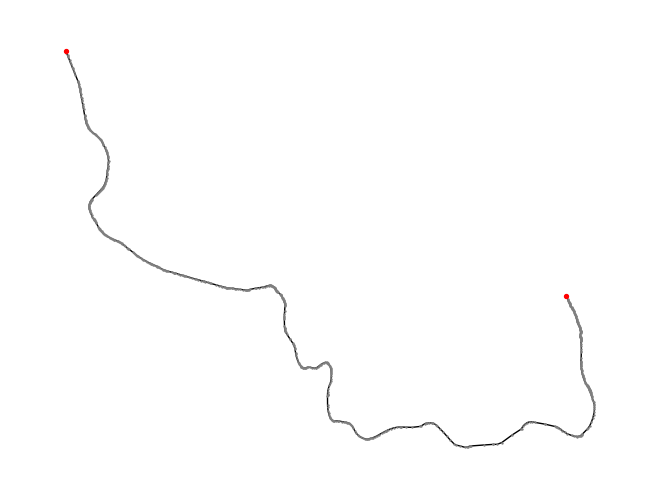

1
Waterloo & City


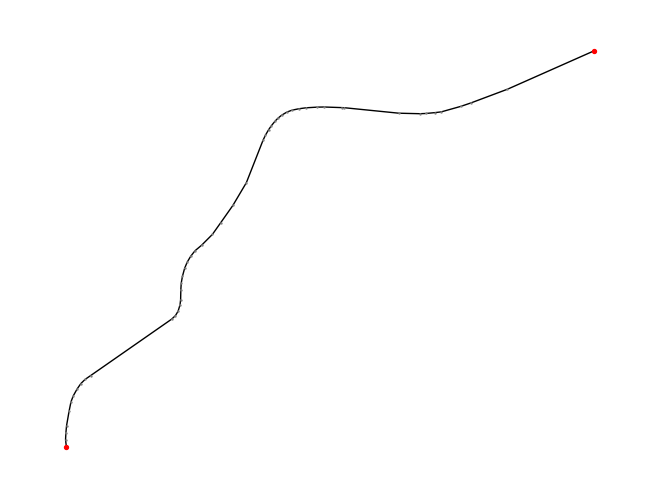

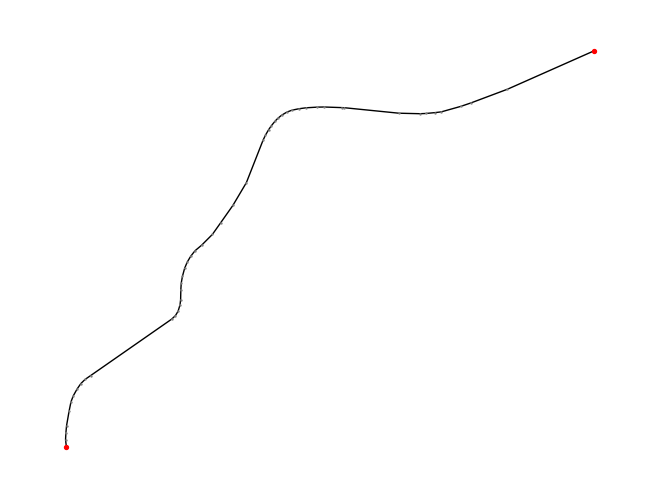

1
DLR


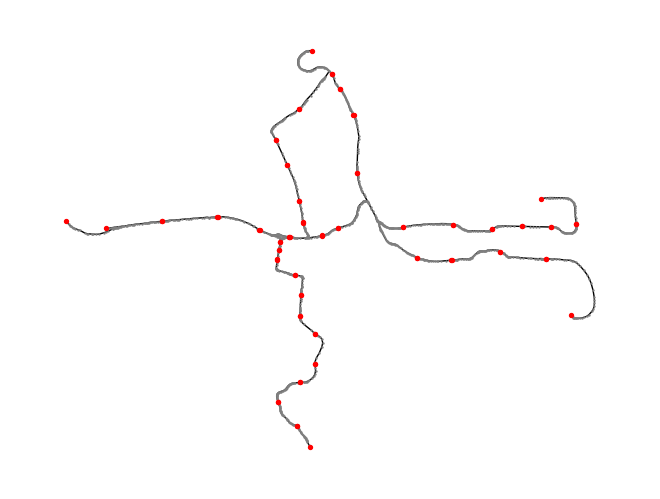

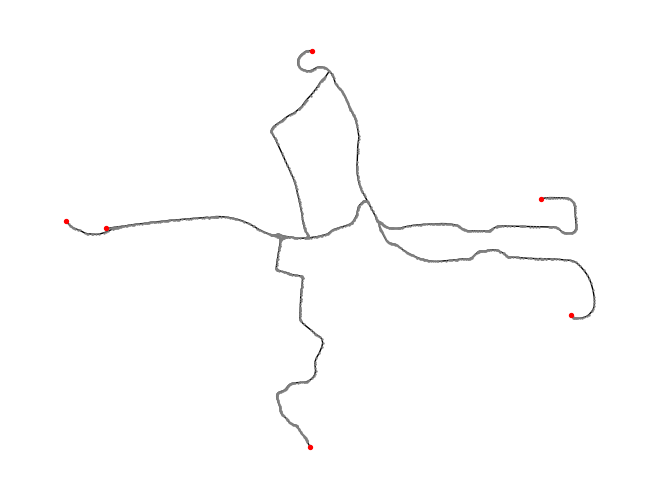

1
Victoria


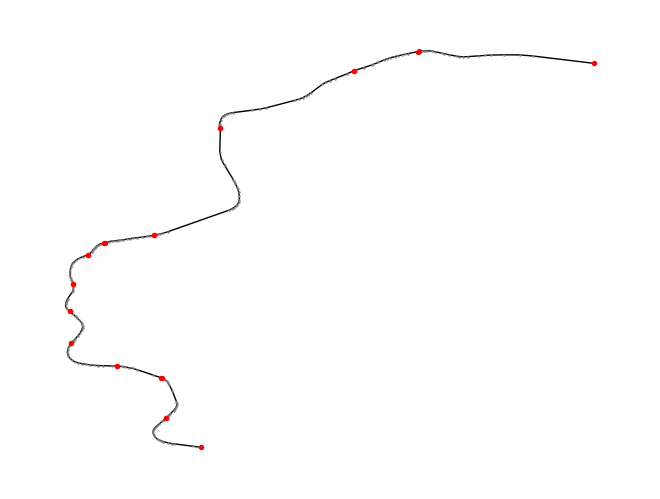

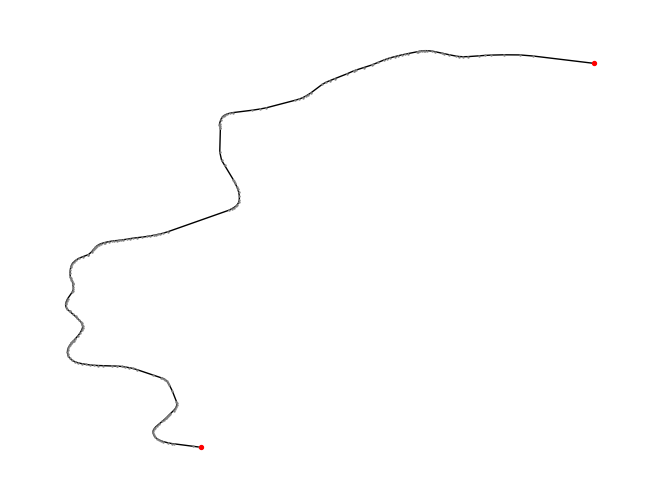

1
Piccadilly


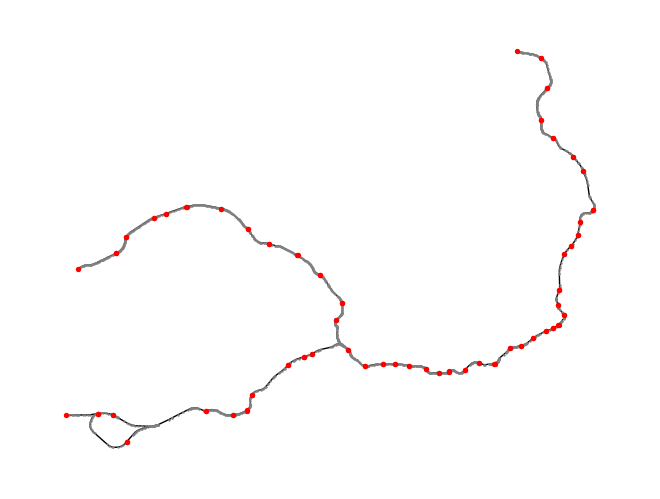

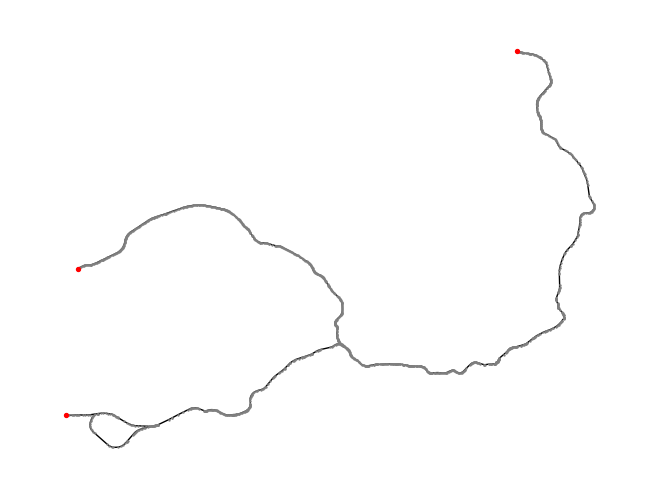

1
Metropolitan


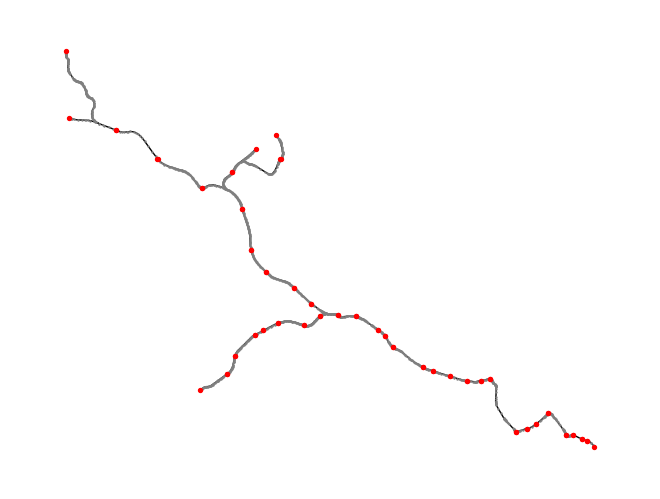

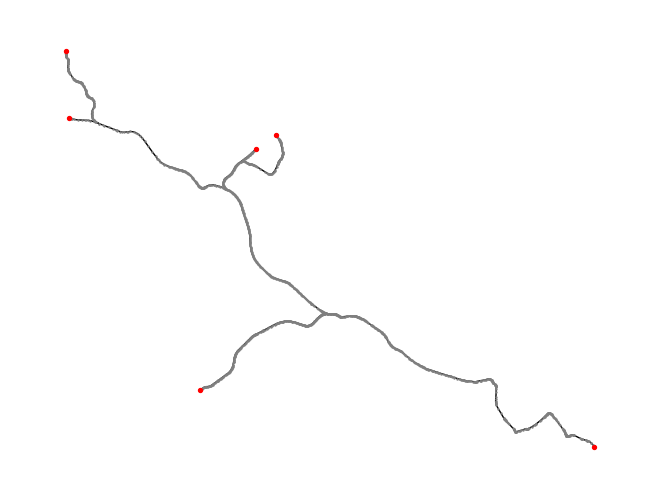

1
Northern


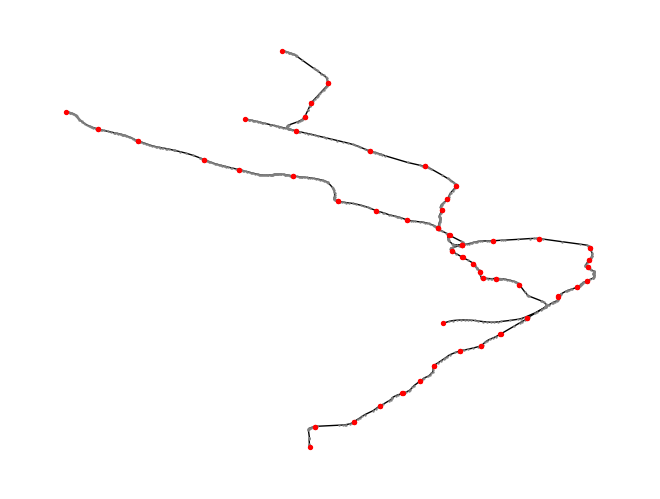

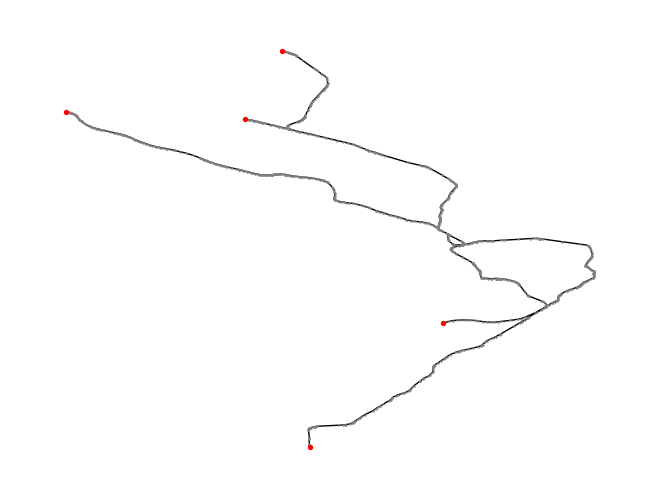

1
Circle


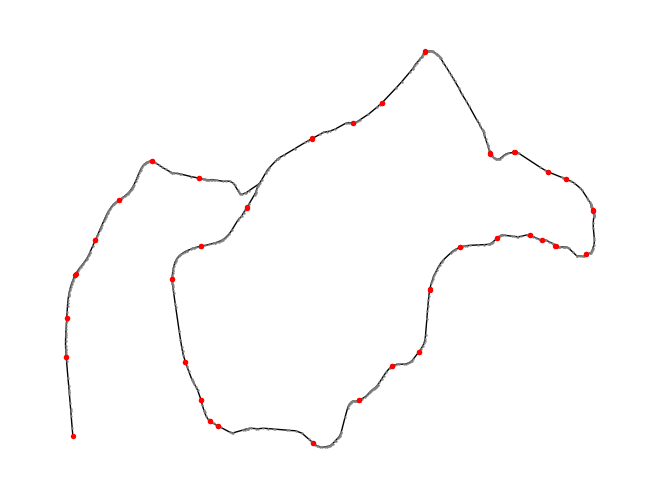

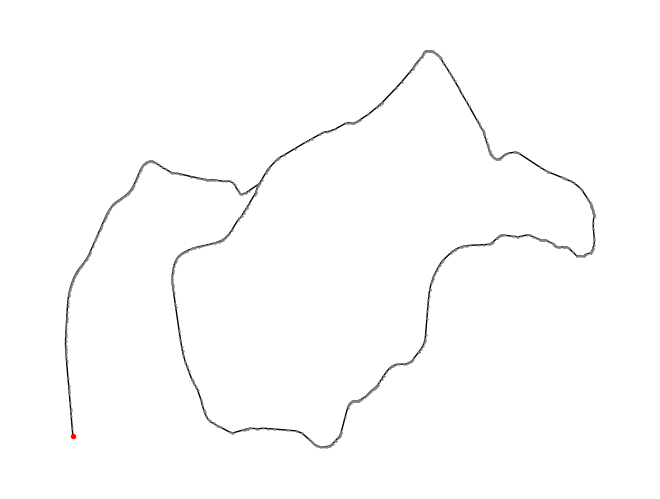

1


In [54]:
#create an empty dict to hold our geometric graphs
geometric_graphs = {}

#iterate through each line individually
for line_name in line_names:
    #skip lines that we won't be using
    if line_name in excluded_lines :
        continue
    print(line_name)
    
    #subset our line and station files for the ones the belong to a specific line
    temp_lines = lines[lines.lines.str.contains(line_name)]
    temp_stations = stations[stations.lines.str.contains(line_name)]
    
    #create empty graph
    G= nx.Graph()
    
    #iterate through our line geometries
    for i, line in temp_lines.iterrows():
        #get list of coordinates that define our line
        _l = list(line.geometry.coords)

        #add coordinates as edges
        G.add_edges_from(list(zip(_l,_l[1:])))
    
    #remove any self loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    #the position of the node is the name of the node
    #let's extract this to plot our graph
    pos = {n: n for n in G.nodes()}
    
    # get degree one nodes
    D = nx.degree(G)
    k1 = [node for node,degree in D if degree==1]
    #let's plot our graph and all degree one nodes
    nx.draw(G, pos=pos, node_size=0.5, node_color='grey')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=k1, node_color='red', node_size=8)
    plt.show()
    
    #get distance between all points of 1-degree, this will be a matrix
    dist = distance.cdist(k1, k1)
    
    #add edges between points that are close
    for j in range(dist.shape[0]-1):
        temp = dist[j][j+1:]
        #get index of closest node
        i_min = np.argmin(temp)
        if dist[j][i_min+j+1]<50:
            G.add_edge(k1[j],k1[i_min+j+1]) 
    
    #recalculate degree
    D = nx.degree(G)
    k1 = [node for node,degree in D if degree==1]
    #plot new graph
    nx.draw(G, pos=pos, node_size=0.5, node_color='grey')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=k1, node_color='red', node_size=8)
    plt.show()
    print(nx.number_connected_components(G))
    #store graph in dictionary
    geometric_graphs[line_name] = G


In [55]:
#create a dataframe with all geometries from all valid lines
#this list will contain a dictionary for each edge in our graph that contains
# node pairs, line name, and a geometry (this is just for quick visualization purposes and will be replaced by true geometry)
edge_list = []
def _has_ids(k):
    #helper function to check if line contains id of start and end station
    if ('start_sid' in k.keys()) and ('end_sid' in k.keys()):
        return True
    else:
        return False

#iterate through each line seperately 
for line_name in line_names:
    if line_name in excluded_lines :
        continue
        
    #subset lines and stations
    temp_lines = lines[lines.lines.str.contains(line_name)]
    temp_stations = stations[stations.lines.str.contains(line_name)]
    
    #for each line in our subset dataframe get each origin and destination pair
    for i, line in temp_lines.iterrows():
        for k in json.loads(line.lines):
            if k['name'] == line_name:
                if _has_ids(k):
                    #get start and end station ids
                    start_id = k['start_sid']
                    end_id = k['end_sid']

                    #get info of start and end station
                    start_station = temp_stations[(temp_stations.id == start_id) | (temp_stations.altmodeid == start_id)].values
                    end_station = temp_stations[(temp_stations.id == end_id) | (temp_stations.altmodeid == end_id)].values
                    
                    #if no matching station exist, let's just take the starting and ending coordinate of the line for now
                    if len(start_station) >= 1 and len(end_station) >=1:
                        s_geom = start_station[0][-1].coords[0]
                        e_geom = end_station[0][-1].coords[0]
                        edge_list.append({
                            'line_name': line_name,
                            'start_id': start_id,
                            'end_id': end_id,
                            'geometry': LineString([s_geom, e_geom])
                        })

,line_name,start_id,end_id,geometry
0,London Overground,910GCAMHTH,910GBTHNLGR,"LINESTRING (534826.877 183290.997, 534724.660 ..."
1,London Overground,910GCAMHTH,910GLONFLDS,"LINESTRING (534826.877 183290.997, 534782.941 ..."
2,London Overground,910GLONFLDS,910GHAKNYNM,"LINESTRING (534782.941 184260.470, 534531.043 ..."
3,London Overground,910GHAKNYNM,910GRCTRYRD,"LINESTRING (534531.043 185134.568, 533997.280 ..."
4,London Overground,910GRCTRYRD,910GSTKNWNG,"LINESTRING (533997.280 186185.005, 533682.473 ..."


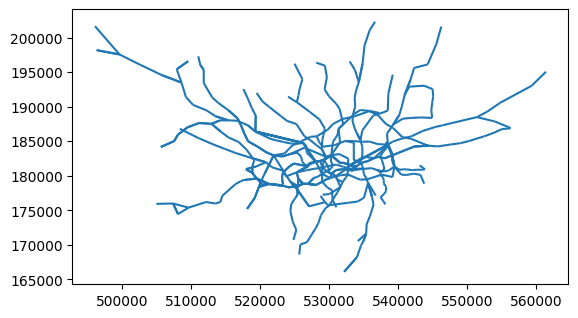

In [56]:
#turn our dictionary list into a geopandas df to quickly plot and sanity check our work
edge_gdf = gpd.GeoDataFrame(edge_list)
edge_gdf.crs = lines.crs
edge_gdf.plot()
edge_gdf.head()

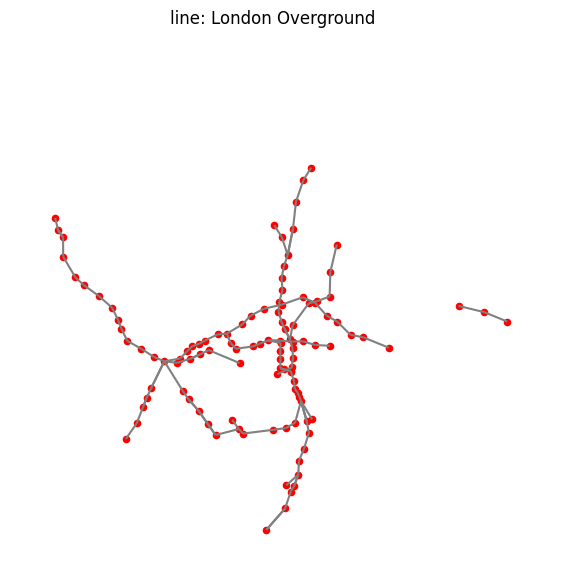

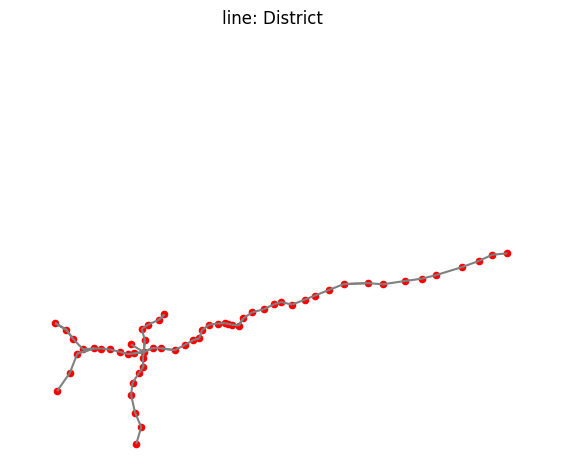

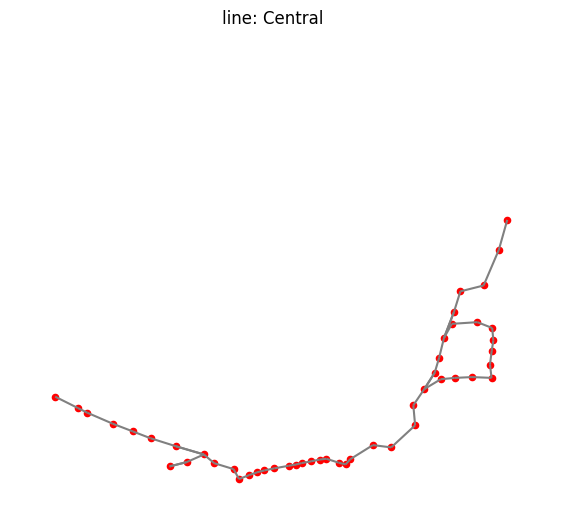

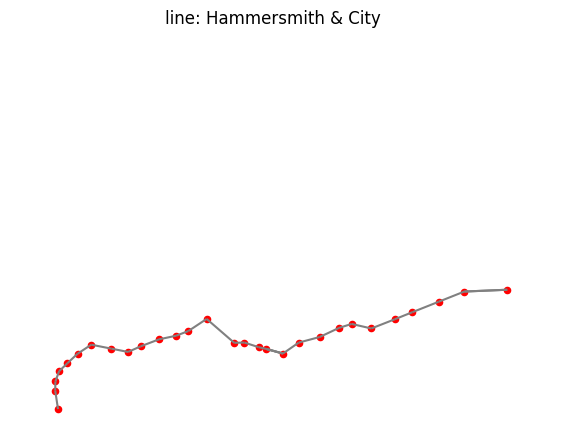

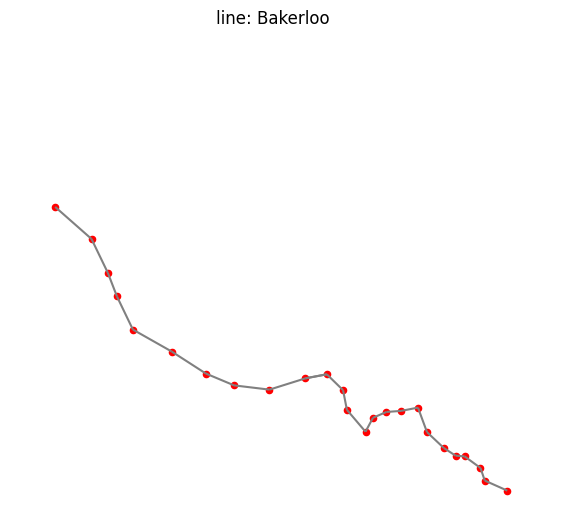

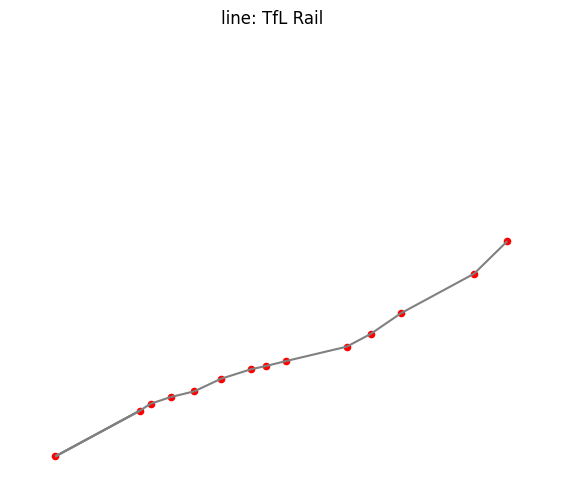

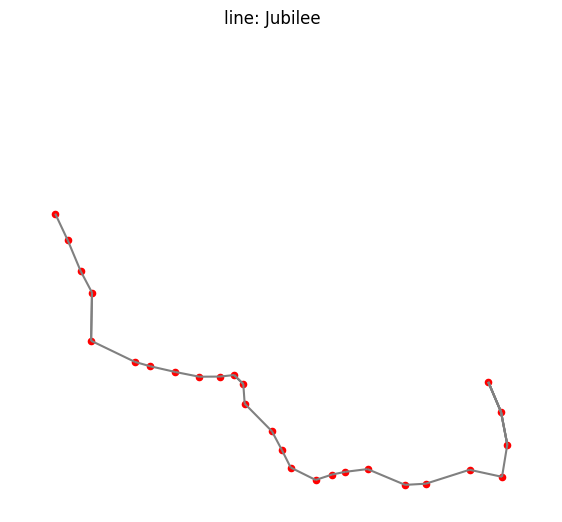

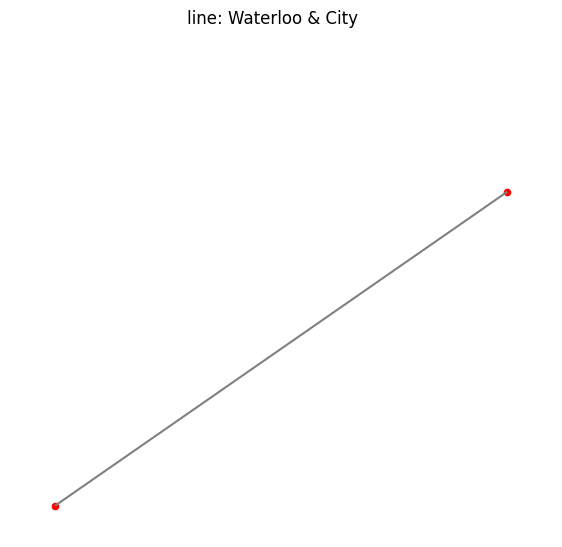

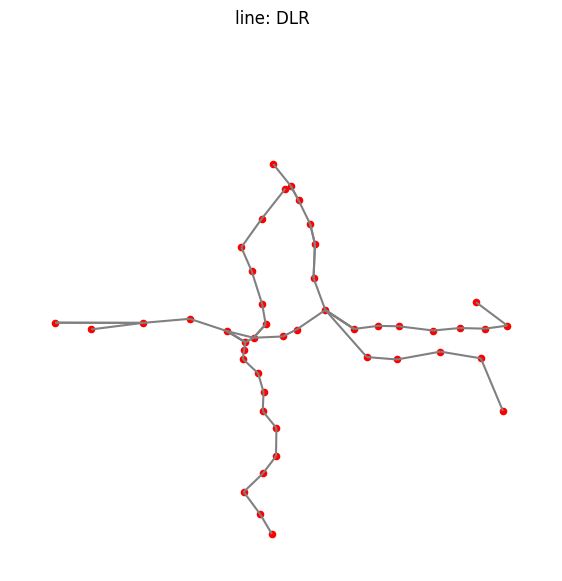

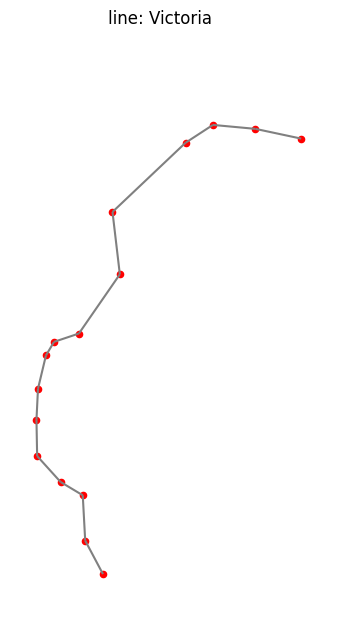

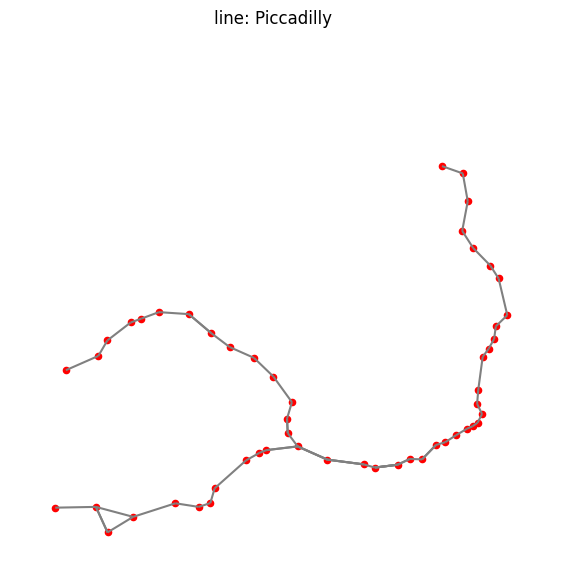

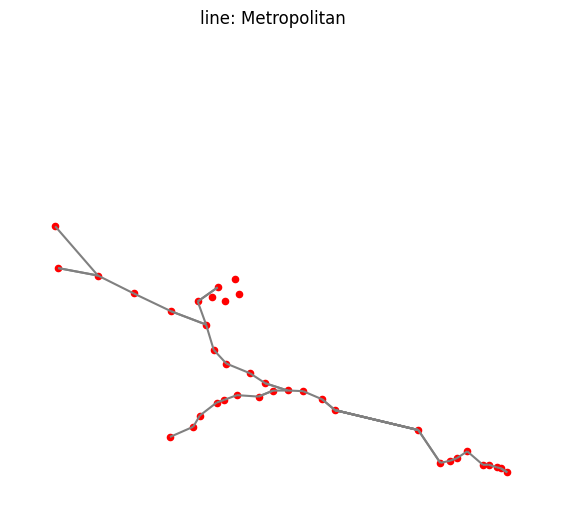

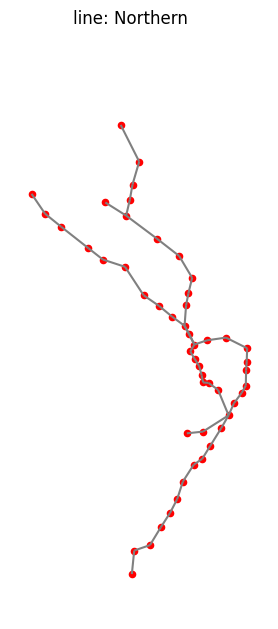

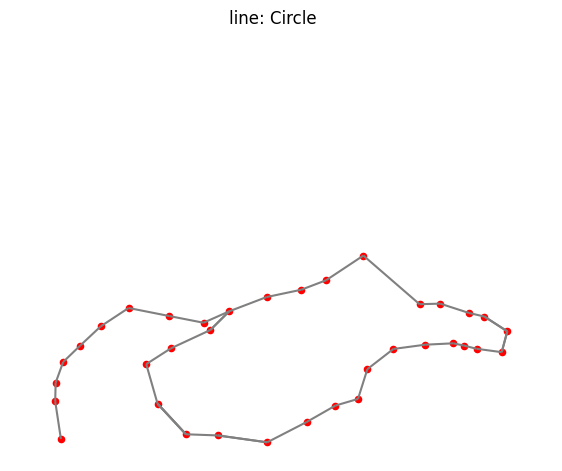

In [57]:
### Add geometry information back into the graph
for line_name in line_names:
    if line_name in excluded_lines :
        continue
    temp_lines = edge_gdf[edge_gdf.line_name == line_name]
    temp_stations = stations[stations.lines.str.contains(line_name)]
    
    #let's plot our lines so we can check them
    fig, ax = plt.subplots(figsize = (7,7))
    fig.suptitle(f'line: {line_name}')
    ax.set_aspect("equal")
    ax.axis('off')
    ax.margins(0.1)
    
    base = temp_lines.plot(ax=ax, color='grey')
    temp_stations.plot(ax=base, markersize=20, color='red')
    plt.show()
    
    #add real geometry back
    for i, edge in temp_lines.iterrows():
        #get start and end of line coordinates
        start = edge.geometry.coords[0]
        end = edge.geometry.coords[-1]
        
        #let's get all the coordinates in our geometric graph
        nodes = list(geometric_graphs[line_name].nodes)
        
        #find nearest node in graph to origin and destination
        s_dist = distance.cdist([start], nodes)[0]
        s_i = np.argmin(s_dist)
        source= nodes[s_i]
        
        t_dist = distance.cdist([end], nodes)[0]
        t_i = np.argmin(t_dist)
        target= nodes[t_i]
        
        #get shortest path
        sp = nx.shortest_path(geometric_graphs[line_name], source, target)
        
        #make into geometry
        #notice how I'm also adding the start and end coordinates to the line definition
        #this fixes the problem of stations and lines not matching up
        geometry = LineString([start] + sp + [end])
        edge_gdf.loc[i, 'geometry'] = geometry

In [58]:
# store the length of the real geometry
edge_gdf['length'] = edge_gdf.geometry.length

In [59]:
edge_gdf.head()

,line_name,start_id,end_id,geometry,length
0,London Overground,910GCAMHTH,910GBTHNLGR,"LINESTRING (534826.877 183290.997, 534827.512 ...",1079.534723
1,London Overground,910GCAMHTH,910GLONFLDS,"LINESTRING (534826.877 183290.997, 534827.512 ...",979.416986
2,London Overground,910GLONFLDS,910GHAKNYNM,"LINESTRING (534782.941 184260.470, 534782.678 ...",926.012712
3,London Overground,910GHAKNYNM,910GRCTRYRD,"LINESTRING (534531.043 185134.568, 534531.871 ...",1201.022377
4,London Overground,910GRCTRYRD,910GSTKNWNG,"LINESTRING (533997.280 186185.005, 533998.001 ...",783.255714


In [60]:
#let's replace the ids with the actual name
#get all station names
station_names_2 = {row.altmodeid: row['name'] for i, row in stations.iterrows() if row.altmodeid != None}
station_names.update(station_names_2)

In [61]:
edge_gdf['start_id'] = edge_gdf['start_id'].apply(lambda x: station_names[x])
edge_gdf['end_id'] = edge_gdf['end_id'].apply(lambda x: station_names[x])

In [62]:
#now we can use this to create our network!
G = nx.from_pandas_edgelist(edge_gdf, source = 'start_id', target='end_id', edge_attr=['length', 'line_name'])

{'District', 'Waterloo & City', 'DLR', 'Victoria', 'Piccadilly', 'Central', 'Hammersmith & City', 'Bakerloo', 'Jubilee', 'Metropolitan', 'London Overground', 'TfL Rail', 'Northern', 'Circle'}


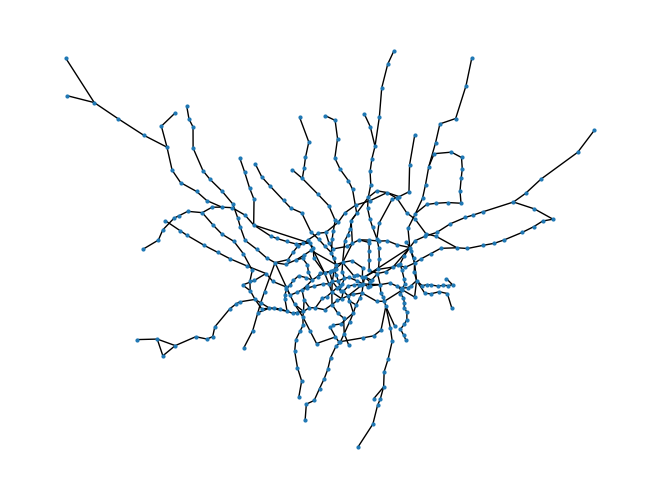

In [63]:
pos = {row['name']: row.geometry.coords[0] for i, row in stations.iterrows() if row['name'] in G.nodes()}
Gcc = nx.connected_components(G)
for n in Gcc:
    G_sub = G.subgraph(n)
    lines = [data['line_name'] for u,v, data in G_sub.edges(data=True)]
    print(set(lines))
    nx.draw(G_sub, pos, node_size=4)
    plt.show()

In [64]:
#save position to graph
nx.set_node_attributes(G, pos, 'coords')

##### Check

##### Merge OD data

In [65]:
#check that our OD data and network data match
OD_names = set(london_OD_AMpeak.station_origin.unique())
network_names = set([n for n in G.nodes()])

In [66]:
network_names.symmetric_difference(OD_names)

{'Acton Main Line',
 'Battersea Power Station',
 'Hanwell',
 'Hayes & Harlington',
 'Heathrow Terminal 4 EL',
 'Heathrow Terminals 123',
 'Heathrow Terminals 2 & 3',
 'Heathrow Terminals 2 & 3 EL',
 'Nine Elms',
 'Southall',
 "Walthamstow Queen's Road",
 'Walthamstow Queens Road',
 'West Ealing'}

In [67]:
name_map = {
    'Heathrow Terminal 4 EL': 'Heathrow Terminal 4',
    'Heathrow Terminals 123': 'Heathrow Terminals 2 & 3',
    'Heathrow Terminals 2 & 3 EL': 'Heathrow Terminals 2 & 3',
    "Walthamstow Queen's Road": 'Walthamstow Queens Road'
}

In [68]:
london_OD_AMpeak.station_origin = london_OD_AMpeak.station_origin.apply(
    lambda x: name_map[x] if x in name_map.keys() else x
)
london_OD_AMpeak.station_destination = london_OD_AMpeak.station_destination.apply(
    lambda x: name_map[x] if x in name_map.keys() else x
)

In [69]:
#let's filter out the stations that we don't have in our network
OD_names = set(london_OD_AMpeak.station_origin.unique())
_filter = list(network_names.symmetric_difference(OD_names))
_filter

['Nine Elms',
 'Acton Main Line',
 'Battersea Power Station',
 'Southall',
 'West Ealing',
 'Hayes & Harlington',
 'Hanwell']

In [70]:
london_OD_AMpeak = london_OD_AMpeak[~london_OD_AMpeak.station_origin.isin(_filter)]
london_OD_AMpeak = london_OD_AMpeak[~london_OD_AMpeak.station_destination.isin(_filter)]

##### Add flow data to our network
Our TFL data contains flows for OD pairs, but we don't know the flows passing through each edge in our network. We will have to calculate this assuming fall people travelling from Origin to Destination station are taking the shortest path within the network.

In [71]:
#create a dictionary to store flows for all edges
flows = {(u,v): 0 for u,v in G.edges()}

In [72]:
#calculate shortest paths for all flows and add data to dict
for i, row in london_OD_AMpeak.iterrows():
    source = row.station_origin
    target = row.station_destination
    
    #get shortest path
    path = nx.dijkstra_path(G, source, target)
    
    #our path is a list of nodes, we need to turn this to a list of edges
    path_edges = list(zip(path,path[1:])) 
    
    #add flows to our dict
    for u,v in path_edges:
        try:
            flows[(u,v)] += row.flows
        except:
            flows[(v,u)] += row.flows

In [73]:
#set this as a network attribute
nx.set_edge_attributes(G, flows, 'flows')

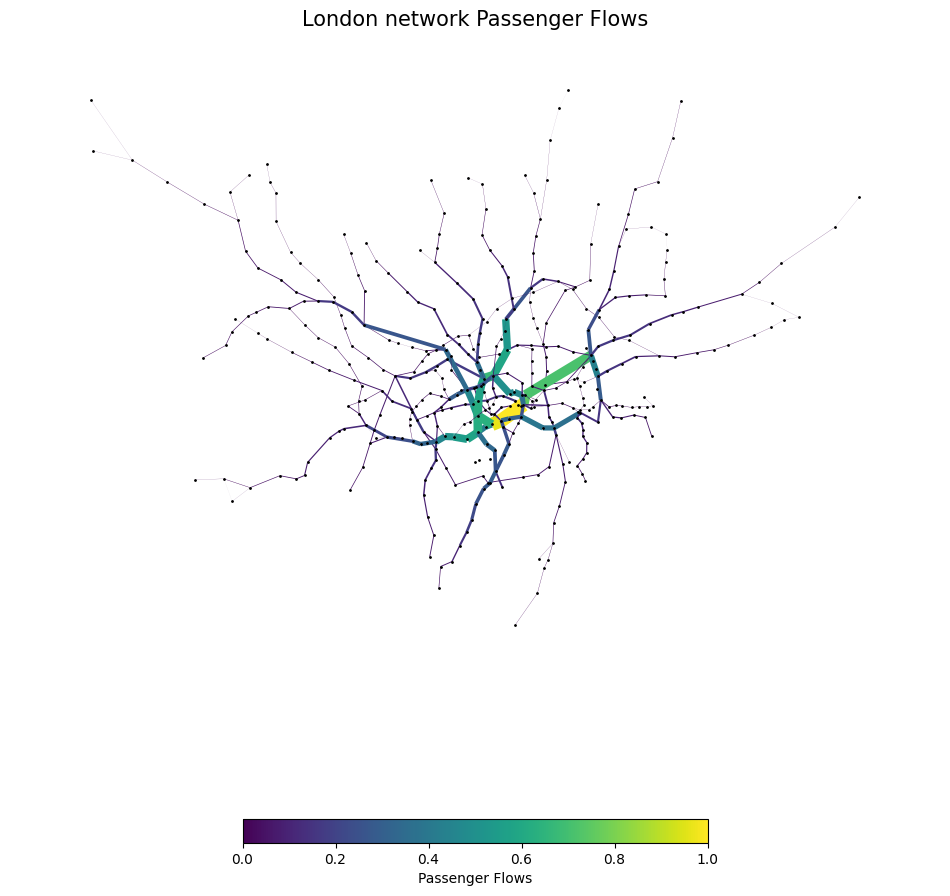

In [74]:
#plot our calcuated flows
flows_values = flows.values()
flow_color=[(i[2]['flows']/max(flows_values)) for i in G.edges(data=True)]
flow_width=[(i[2]['flows']/max(flows_values)*10) for i in G.edges(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

#pos=nx.spring_layout(X)
edg=nx.draw_networkx_edges(G, pos,edge_color=flow_color, width=flow_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Passenger Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London network Passenger Flows",fontsize=15)
plt.show()

#### II.2. 
Now consider the measure for assessing the impact of node removal. Would you adjust the
measure for a weighted network? If yes, how? Propose a different measure that would be better at
assessing the impact of closing a station taking into consideration the passengers.

In [75]:
# weighted
dc_g1 = dict(nx.degree(G,weight='flows'))
bc_g1 = dict(nx.betweenness_centrality(G,weight='flows'))
pr_g1 = dict(nx.pagerank(G,weight='flows'))
cc_g1 = dict(nx.closeness_centrality(G, distance='flows'))

dc_sort_g1 = sorted(dc_g1.items(), key=lambda x:-x[-1])
bc_sort_g1 = sorted(bc_g1.items(), key=lambda x:-x[-1])
pr_sort_g1 = sorted(pr_g1.items(), key=lambda x:-x[-1])
cc_sort_g1 = sorted(cc_g1.items(), key=lambda x:-x[-1])

# save node informations
result = []
for k,v in dc_g1.items():
    result.append([k, v, bc_g1[k], pr_g1[k], cc_g1[k]])

with open('node information weight.csv', 'w+', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['node','degree centrality','betweenness centrality','PageRank centrality', 'Closeness Centrality'])
    writer.writerows(result)

In [76]:
# unweight
dc_g2 = dict(nx.degree_centrality(G))
bc_g2 = dict(nx.betweenness_centrality(G))
pr_g2 = dict(nx.pagerank(G,weight='None'))
cc_g2 = dict(nx.closeness_centrality(G))

dc_sort_g2 = sorted(dc_g2.items(), key=lambda x:-x[-1])
bc_sort_g2 = sorted(bc_g2.items(), key=lambda x:-x[-1])
pr_sort_g2 = sorted(pr_g2.items(), key=lambda x:-x[-1])
cc_sort_g2 = sorted(cc_g2.items(), key=lambda x:-x[-1])

# save node informations
result = []
for k,v in dc_g2.items():
    result.append([k, v, bc_g2[k], pr_g2[k], cc_g2[k]])

with open('node information.csv', 'w+', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['node','degree centrality','betweenness centrality','PageRank centrality', 'Closeness Centrality'])
    writer.writerows(result)

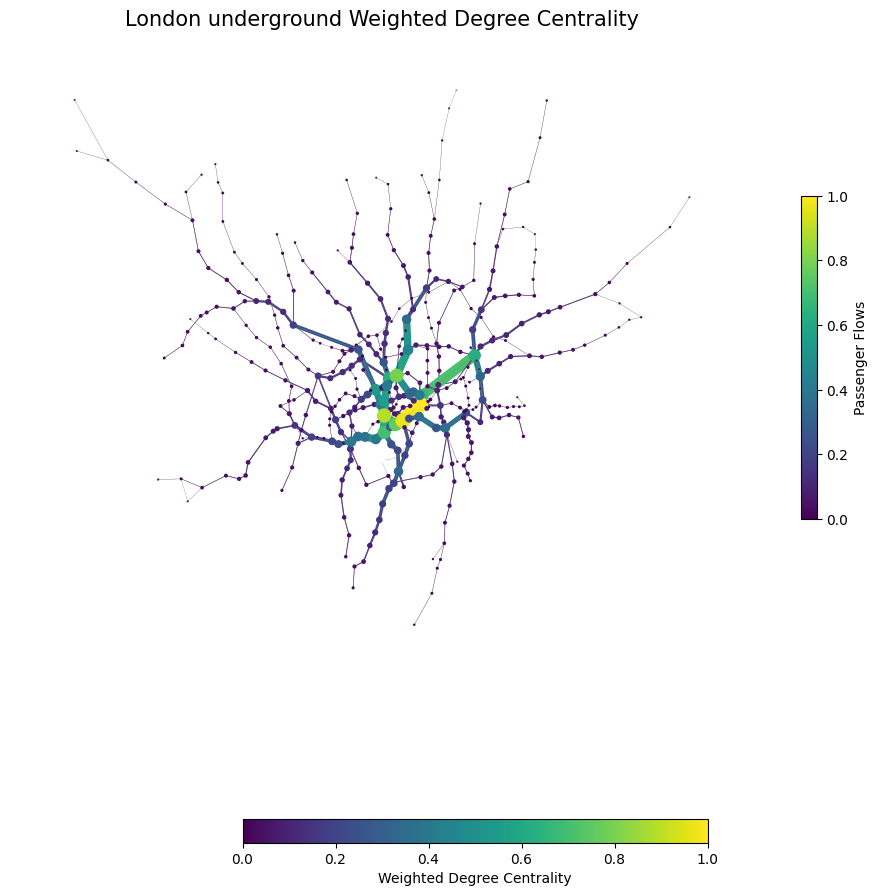

In [77]:
nodes = list(G.nodes())
degree_values=[dc_g1[node] for node in nodes]

deg_color=[(dc_g1[node]/(max(degree_values))) for node in nodes]
deg_size=[(dc_g1[node]/(max(degree_values)))*100 for node in nodes]

# Plot graph

fig, ax = plt.subplots(figsize=(12,12))

edg=nx.draw_networkx_edges(G, pos,edge_color=flow_color, width=flow_width)

nx.draw_networkx_edges(G, pos, edge_color='gray', 
        width=0.2)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Weighted Degree Centrality",orientation="horizontal", shrink=0.5)
plt.colorbar(edg,label="Passenger Flows", shrink=0.5)
plt.axis("off")
plt.title("London underground Weighted Degree Centrality",fontsize=15)
plt.show()


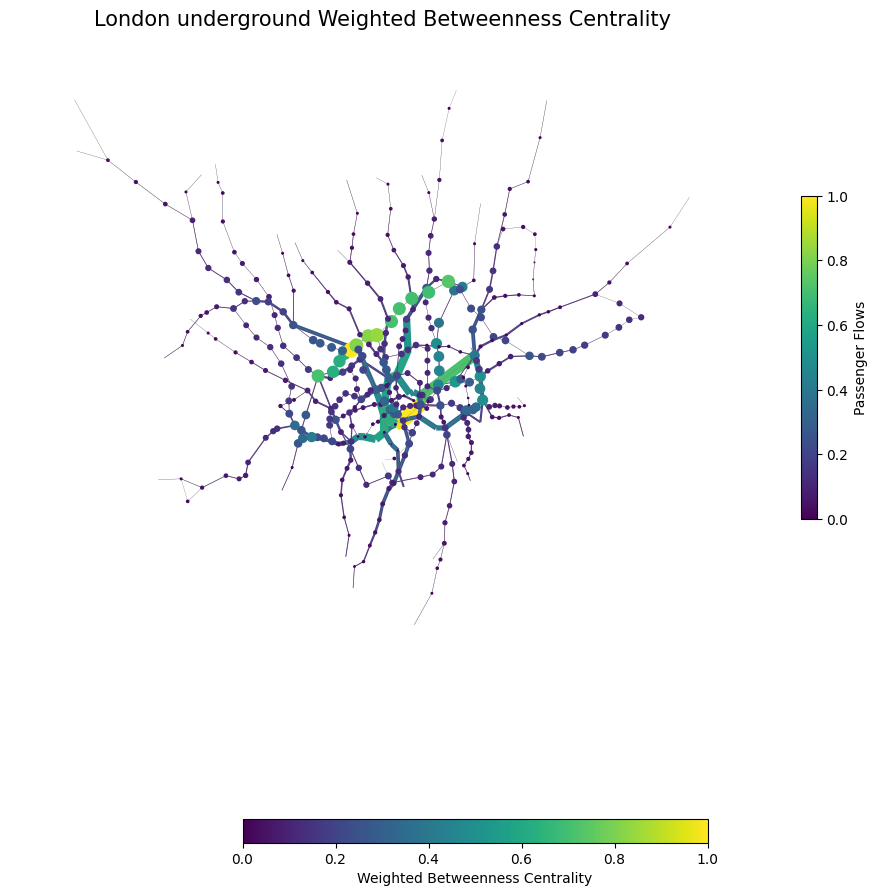

In [78]:
nodes = list(G.nodes())
between_values=[bc_g1[node] for node in nodes]

wbet_color=[(bc_g1[node]/(max(between_values))) for node in nodes]
wbet_size=[(bc_g1[node]/(max(between_values)))*100 for node in nodes]

# Plot graph

fig, ax = plt.subplots(figsize=(12,12))

bet=nx.draw_networkx_edges(G, pos,edge_color=flow_color, width=flow_width)

nx.draw_networkx_edges(G, pos, edge_color='gray', 
        width=0.2)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= wbet_color,
        node_size= wbet_size)

plt.colorbar(nod,label="Weighted Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.colorbar(bet,label="Passenger Flows", shrink=0.5)
plt.axis("off")
plt.title("London underground Weighted Betweenness Centrality",fontsize=15)
plt.show()


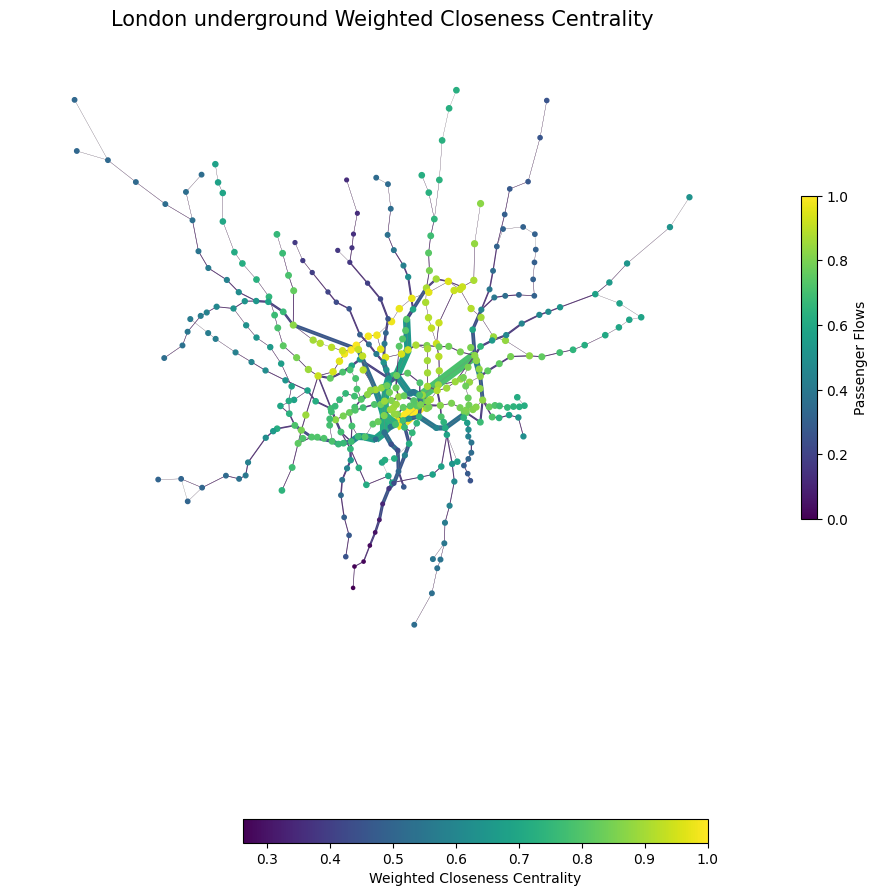

In [79]:

wcc_values=[cc_g1[node] for node in nodes]

wcc_color=[(cc_g1[node]/(max(wcc_values))) for node in nodes]
wcc_size=[(cc_g1[node]/(max(wcc_values)))*20 for node in nodes]

# Plot graph

fig, ax = plt.subplots(figsize=(12,12))

wcc=nx.draw_networkx_edges(G, pos,edge_color=flow_color, width=flow_width)

nx.draw_networkx_edges(G, pos, edge_color='gray', 
        width=0.2)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= wcc_color,
        node_size= wcc_size)

plt.colorbar(nod,label="Weighted Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.colorbar(wcc,label="Passenger Flows", shrink=0.5)
plt.axis("off")
plt.title("London underground Weighted Closeness Centrality",fontsize=15)
plt.show()


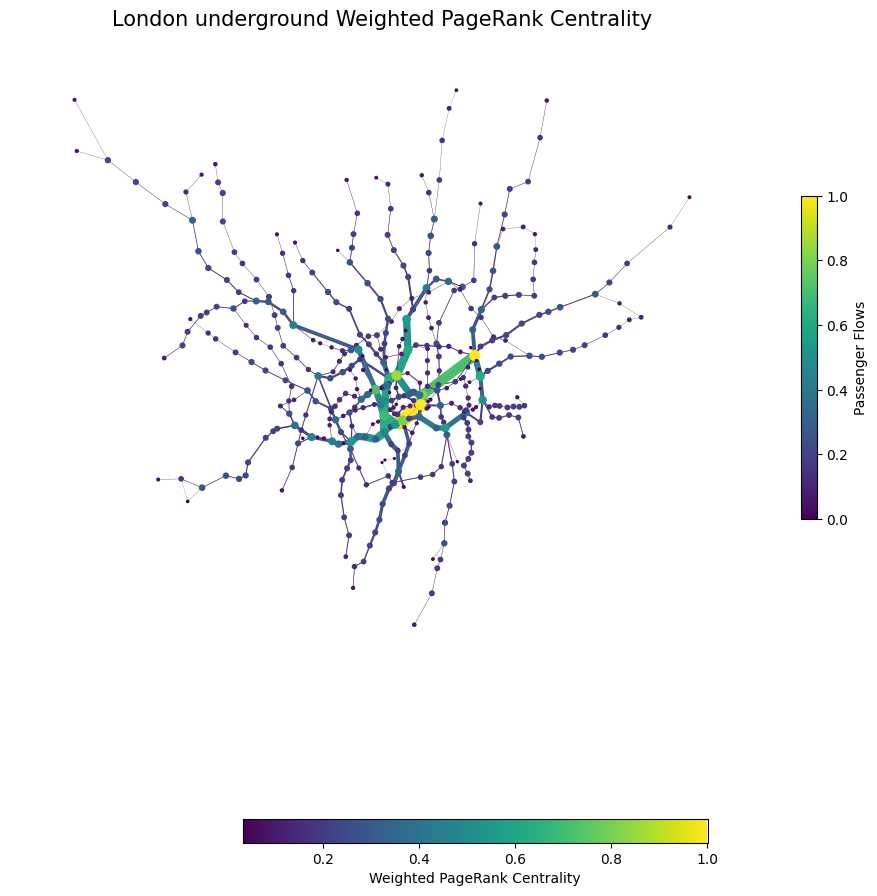

In [80]:
pagerank_values=[pr_g1[node] for node in nodes]

pr_color=[(pr_g1[node]/(max(pagerank_values))) for node in nodes]
pr_size=[(pr_g1[node]/(max(pagerank_values)))*50 for node in nodes]

# Plot graph

fig, ax = plt.subplots(figsize=(12,12))

edg=nx.draw_networkx_edges(G, pos,edge_color=flow_color, width=flow_width)
nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.2)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= pr_color,
        node_size= pr_size)

plt.colorbar(nod,label="Weighted PageRank Centrality",orientation="horizontal", shrink=0.5)
plt.colorbar(edg,label="Passenger Flows", shrink=0.5)
plt.axis("off")
plt.title("London underground Weighted PageRank Centrality",fontsize=15)
plt.show()

In [81]:
TOK_K = 10

for i in range(TOK_K):
    print("Degree centrality ranking {:3} is the  {:30} node, and the value is {}".format(i+1, dc_sort_g1[i][0], dc_sort_g1[i][1]))

Degree centrality ranking   1 is the  Bank and Monument              node, and the value is 584419
Degree centrality ranking   2 is the  Waterloo                       node, and the value is 565506
Degree centrality ranking   3 is the  Green Park                     node, and the value is 518578
Degree centrality ranking   4 is the  King's Cross St. Pancras       node, and the value is 463423
Degree centrality ranking   5 is the  Westminster                    node, and the value is 444275
Degree centrality ranking   6 is the  Victoria                       node, and the value is 410460
Degree centrality ranking   7 is the  Liverpool Street               node, and the value is 388437
Degree centrality ranking   8 is the  Euston                         node, and the value is 369836
Degree centrality ranking   9 is the  Stratford                      node, and the value is 364387
Degree centrality ranking  10 is the  Oxford Circus                  node, and the value is 325102


In [82]:
for i in range(TOK_K):
    print("Betweenness centrality ranking {:3} is the {:30} node, and the value is {}".format(i+1, bc_sort_g1[i][0], bc_sort_g1[i][1]))

Betweenness centrality ranking   1 is the West Hampstead                 node, and the value is 0.34962719298245615
Betweenness centrality ranking   2 is the Gospel Oak                     node, and the value is 0.2947619047619048
Betweenness centrality ranking   3 is the Finchley Road & Frognal        node, and the value is 0.2867042606516291
Betweenness centrality ranking   4 is the Hampstead Heath                node, and the value is 0.2861152882205514
Betweenness centrality ranking   5 is the Blackhorse Road                node, and the value is 0.2567355889724311
Betweenness centrality ranking   6 is the Willesden Junction             node, and the value is 0.2481234335839599
Betweenness centrality ranking   7 is the Upper Holloway                 node, and the value is 0.2461466165413534
Betweenness centrality ranking   8 is the Crouch Hill                    node, and the value is 0.24469298245614035
Betweenness centrality ranking   9 is the Harringay Green Lanes          node,

In [83]:
for i in range(TOK_K):
    print("PageRank centrality ranking {:3} is the {:30} node, and the value is {}".format(i+1, pr_sort_g1[i][0], pr_sort_g1[i][1]))

PageRank centrality ranking   1 is the Bank and Monument              node, and the value is 0.011926961039912325
PageRank centrality ranking   2 is the Stratford                      node, and the value is 0.011921161618851074
PageRank centrality ranking   3 is the King's Cross St. Pancras       node, and the value is 0.010268816567138225
PageRank centrality ranking   4 is the Liverpool Street               node, and the value is 0.009629358189742972
PageRank centrality ranking   5 is the Waterloo                       node, and the value is 0.009587729728455953
PageRank centrality ranking   6 is the Baker Street                   node, and the value is 0.008721595691539599
PageRank centrality ranking   7 is the Green Park                     node, and the value is 0.008248953607641532
PageRank centrality ranking   8 is the Euston                         node, and the value is 0.007681145860333305
PageRank centrality ranking   9 is the West Ham                       node, and the valu

In [84]:
for i in range(TOK_K):
    print("Closeness centrality ranking {:3} is the {:30} node, and the value is {}".format(i+1, cc_sort_g1[i][0], cc_sort_g1[i][1]))

Closeness centrality ranking   1 is the West Hampstead                 node, and the value is 5.769686324800539e-06
Closeness centrality ranking   2 is the Finchley Road & Frognal        node, and the value is 5.7307077942754985e-06
Closeness centrality ranking   3 is the Hampstead Heath                node, and the value is 5.696565083761652e-06
Closeness centrality ranking   4 is the Gospel Oak                     node, and the value is 5.677477814545755e-06
Closeness centrality ranking   5 is the Brondesbury                    node, and the value is 5.671385732211344e-06
Closeness centrality ranking   6 is the Upper Holloway                 node, and the value is 5.658711188350004e-06
Closeness centrality ranking   7 is the Crouch Hill                    node, and the value is 5.632601565452055e-06
Closeness centrality ranking   8 is the Harringay Green Lanes          node, and the value is 5.604541898336244e-06
Closeness centrality ranking   9 is the Kentish Town West              

#### II.3. 
Remove only the 3 highest ranked nodes according to the best performing centrality measure
found in I.1. Evaluate the impact according to the 2 measures in II.2. Repeat the experiment for the
highest 3 ranked nodes using the adjusted measure. Critically discuss which station closure will have
the largest impact on passengers, referring to your measures and results.

In [85]:
def cal_network_efficiency(G,N):

    
    e = 0
    nodes = list(G.nodes())

    if len(nodes) < 2:
        return 0,0

    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if i != j:
                try:
                    path = nx.shortest_path(G, nodes[i], nodes[j])
                    t = 0
                    for k in range(len(path)-1):
                        weight = G.get_edge_data(path[k], path[k+1])['flows']
                        t += weight
                    e += 1/t
                    
                except:
                    d = 0
                    e += 0

    E = e / (N*(N-1))

    return E

In [86]:
def att_node_second(G1, nodes_sort):
    '''
    node removal non-sequential
    '''

    G = G1.copy()

    res_eff = []
 

    # Initial efficiency and largest connected component size
    N = len(G.nodes())
    e0 = cal_network_efficiency(G,N)
    
    res_eff.append(e0)


    for node in nodes_sort:
        
        G = G1.copy()
        
        G.remove_node(node)
        

        e= cal_network_efficiency(G,N)
        
        res_eff.append(e)
       
        

    return res_eff


In [87]:
dc_sort_node_g1 = [k for k,v in dc_sort_g1]
bc_sort_node_g1 = [k for k,v in bc_sort_g1]
pr_sort_node_g1 = [k for k,v in pr_sort_g1]

In [88]:
dc_eff_g1 = att_node_second(G, dc_sort_node_g1[:3])
bc_eff_g1 = att_node_second(G, bc_sort_node_g1[:3])
pr_eff_g1 = att_node_second(G, pr_sort_node_g1[:3])

In [89]:
print(pr_eff_g1)
print(dc_sort_node_g1[:3])
print(pr_lcc_g1)

[4.709424241709087e-06, 4.7634762600592526e-06, 4.697597513172654e-06, 4.814700990191944e-06]
['Bank and Monument', 'Waterloo', 'Green Park']


NameError: name 'pr_lcc_g1' is not defined

In [90]:
def cal_network_efficiency_apl(G,N):

    apl = 0
    e = 0
    nodes = list(G.nodes())

    if len(nodes) < 2:
        return 0,0

    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if i != j:
                try:
                    path = nx.shortest_path(G, nodes[i], nodes[j])
                    t = 0
                    for k in range(len(path)-1):
                        weight = G.get_edge_data(path[k], path[k+1])['flows']
                        t += weight
                    e += 1/t
                    apl += t
                except:
                    d = 0
                    e += 0

    E = e / (N*(N-1))
    APL = apl / (N*(N-1))

    return E, APL


def cal_largest_connected_component(G,N):

    nums = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

    if len(nums):
        return nums[0] / N
    else:
        return 0

In [92]:
def att_node_second(G1, nodes_sort):
    '''
    node removal non-sequential
    '''

    G = G1.copy()

    res_eff = []
    res_apl = []
    res_lcc = []

    # Initial efficiency and largest connected component size
    N = len(G.nodes())
    e0, apl = cal_network_efficiency_apl(G,N)
    lcc = cal_largest_connected_component(G, N)
    res_eff.append(e0)

    res_apl.append(apl)
    res_lcc.append(lcc)

    for node in nodes_sort:
        
        G = G1.copy()
        
        G.remove_node(node)
        

        e, apl = cal_network_efficiency_apl(G,N)
        lcc = cal_largest_connected_component(G, N)
        res_eff.append(e)
        res_apl.append(apl)
        res_lcc.append(lcc)
        

    return res_eff, res_apl, res_lcc


In [93]:
bc_sort_node_g2 = [k for k,v in bc_sort_g2]
bc_eff_2, bc_apl_2, bc_lcc_2 = att_node_second(G, bc_sort_node_g2[:3])

In [94]:
print(bc_eff_2)
print(bc_sort_node_g2[:3])
print(bc_lcc_2)
print(bc_apl_2)

[4.709424241709087e-06, 4.697597513172654e-06, 4.7634762600592526e-06, 4.9300025546710025e-06]
['Stratford', 'Bank and Monument', 'Liverpool Street']
[1.0, 0.9451371571072319, 0.9975062344139651, 0.9975062344139651]
[644784.361340399, 495850.3930673317, 582903.8081546135, 553626.1236284289]


In [95]:
dc_sort_node_g1 = [k for k,v in dc_sort_g1]
bc_sort_node_g1 = [k for k,v in bc_sort_g1]
pr_sort_node_g1 = [k for k,v in pr_sort_g1]


In [96]:
dc_eff_g1, dc_apl_g1, dc_lcc_g1 = att_node_second(G, dc_sort_node_g1[:3])
bc_eff_g1, bc_apl_g1, bc_lcc_g1 = att_node_second(G, bc_sort_node_g1[:3])
pr_eff_g1, pr_apl_g1, pr_lcc_g1 = att_node_second(G, pr_sort_node_g1[:3])

In [97]:
print(pr_eff_g1)
print(pr_sort_node_g1[:3])
print(pr_lcc_g1)
print(pr_apl_g1)

[4.709424241709087e-06, 4.7634762600592526e-06, 4.697597513172654e-06, 4.814700990191944e-06]
['Bank and Monument', 'Stratford', "King's Cross St. Pancras"]
[1.0, 0.9975062344139651, 0.9451371571072319, 0.9975062344139651]
[644784.361340399, 582903.8081546135, 495850.3930673317, 665289.92]


In [98]:
print(dc_eff_g1)
print(dc_sort_node_g1[:3])
print(dc_lcc_g1)
print(dc_apl_g1)

[4.709424241709087e-06, 4.7634762600592526e-06, 4.834609429899466e-06, 4.780006725802657e-06]
['Bank and Monument', 'Waterloo', 'Green Park']
[1.0, 0.9975062344139651, 0.9975062344139651, 0.9975062344139651]
[644784.361340399, 582903.8081546135, 552247.7867144638, 592117.9002182045]


In [99]:
print(bc_eff_g1)
print(bc_sort_node_g1[:3])
print(bc_lcc_g1)
print(bc_apl_g1)

[4.709424241709087e-06, 4.534535452340036e-06, 4.540610684145375e-06, 4.5758881015966335e-06]
['West Hampstead', 'Gospel Oak', 'Finchley Road & Frognal']
[1.0, 0.9975062344139651, 0.9975062344139651, 0.9975062344139651]
[644784.361340399, 654003.2875935162, 651593.7863715711, 650592.5092144639]
